In [1]:
import pandas as pd
import os


# Use pd.read_csv to read the CSV file
df = pd.read_csv("DF_Airbnb_INE_Merged.csv")
df.head(10)


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_23276\4082132525.py:6: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DF_Airbnb_INE_Merged.csv")


,supply_id,date_in,revenue_usd,n_rooms,n_baths,max_guests,deposit_usd,cleaning_fee_usd,extra_people_fee_usd,min_stay,...,Población residente encontrada durante el día en otra área (C),Población no residente que se localiza durante el día en esta área (D),Población total que se localiza durante el día en el área (E=B+D),Saldo población entra y sale de esta área (F=D-C),Porcentaje de población residente que se localiza durante el día en su área de residencia (B*100/A),Porcentaje de población residente que sale de su área (C*100/A),Porcentaje de población no residente que se localiza durante el día en esta área (D*100/A),Cociente entre población total que se localiza durante el día y población residente (E*100/A),Porcentaje de población que gana o pierde durante el día (F*100/A),Provincia
0,ab-16762211,2017-01-01,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
1,ab-16762211,2018-01-01,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
2,ab-6720012,2017-01-01,43.0,1.0,1.0,2.0,0.0,0.0,6.0,2.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
3,ab-6720012,2019-01-01,0.0,1.0,1.0,2.0,0.0,0.0,6.0,2.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
4,ha-4411521ha,2019-01-01,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
5,ab-1703758,2017-01-01,0.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
6,ab-1703758,2019-01-01,0.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
7,ab-1703758,2018-01-01,0.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
8,ab-13013755,2017-01-01,0.0,3.0,1.5,6.0,0.0,0.0,0.0,15.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló
9,ab-13013755,2018-01-01,0.0,3.0,1.5,6.0,0.0,0.0,0.0,15.0,...,30876,33185,143222,2309,63.30625,17.58125,19.14,82.45,1.56,Castellón/Castelló


In [2]:
# Assuming 'df' is your DataFrame
# Convert the column to numeric, coercing errors to NaN
df['Número de áreas de residencia distintas en las que reside población que se encuentra durante el día en esta área'] = pd.to_numeric(df['Número de áreas de residencia distintas en las que reside población que se encuentra durante el día en esta área'], errors='coerce')


In [3]:
# Group by Municipality and aggregate the data
# Group by Municipality and aggregate the data
municipality_stats = df.groupby('Municipality_y').agg({
    'Número de áreas de destino distintas en las que se encuentra durante el día población residente en esta área': 'first',
    'Número de áreas de residencia distintas en las que reside población que se encuentra durante el día en esta área': 'first',
    'Población residente (A)': 'first',
    'Población residente que se localiza durante el día en su área de residencia (B)': 'first',
    'Población residente encontrada durante el día en otra área (C)': 'first',
    'Población no residente que se localiza durante el día en esta área (D)': 'first',
    'Población total que se localiza durante el día en el área (E=B+D)': 'first',
    'Saldo población entra y sale de esta área (F=D-C)': 'first',
    'Porcentaje de población residente que se localiza durante el día en su área de residencia (B*100/A)': 'first',
    'Porcentaje de población residente que sale de su área (C*100/A)': 'first',
    'Porcentaje de población no residente que se localiza durante el día en esta área (D*100/A)': 'first',
    'Cociente entre población total que se localiza durante el día y población residente (E*100/A)': 'first',
    'Porcentaje de población que gana o pierde durante el día (F*100/A)': 'first',
    'lat': 'first',
    'lon': 'first'
}).reset_index()

# Display the aggregated data
municipality_stats

,Municipality_y,Número de áreas de destino distintas en las que se encuentra durante el día población residente en esta área,Número de áreas de residencia distintas en las que reside población que se encuentra durante el día en esta área,Población residente (A),Población residente que se localiza durante el día en su área de residencia (B),Población residente encontrada durante el día en otra área (C),Población no residente que se localiza durante el día en esta área (D),Población total que se localiza durante el día en el área (E=B+D),Saldo población entra y sale de esta área (F=D-C),Porcentaje de población residente que se localiza durante el día en su área de residencia (B*100/A),Porcentaje de población residente que sale de su área (C*100/A),Porcentaje de población no residente que se localiza durante el día en esta área (D*100/A),Cociente entre población total que se localiza durante el día y población residente (E*100/A),Porcentaje de población que gana o pierde durante el día (F*100/A),lat,lon
0,Ademuz,1,1.0,2235,1864,121,191,2055,70,83.40,5.41,8.55,91.95,3.13,40.065560,-1.285390
1,Ador,12,13.0,6100,3672,1472,1865,5537,393,60.20,24.13,30.57,90.77,6.44,38.918850,-0.227240
2,Aielo de Malferit,12,11.0,8876,5372,2159,1649,7021,-510,60.52,24.32,18.58,79.10,-5.75,38.877625,-0.589043
3,Alaquàs,59,55.0,29711,17916,7470,5238,23154,-2232,60.30,25.14,17.63,77.93,-7.51,39.457450,-0.450900
4,Albaida,9,12.0,8734,5415,2013,2465,7880,452,62.00,23.05,28.22,90.22,5.18,38.844830,-0.520120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Xaló,6,6.0,5583,3788,1137,633,4421,-504,67.85,20.37,11.34,79.19,-9.03,38.752850,-0.028278
205,Xeraco,9,10.0,7917,5465,1337,1625,7090,288,69.03,16.89,20.53,89.55,3.64,39.044960,-0.197190
206,Xirivella,56,49.0,30197,17118,8285,4700,21818,-3585,56.69,27.44,15.56,72.25,-11.87,39.466849,-0.417321
207,Xàtiva,33,38.0,29623,21170,4233,6983,28153,2750,71.46,14.29,23.57,95.04,9.28,38.989880,-0.514740


In [4]:
import pandas as pd
import numpy as np
from pyproj import Proj
import time

import sklearn
sklearn.set_config(transform_output="pandas") # works with pandas dataframe rather than matrix and sparse matrix (creates problems)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders.binary import BinaryEncoder

C:\Users\Gonzalo\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [5]:
import pandas as pd

# Assuming your DataFrame is named df and has a 'date_in' column
# Replace 'date_in' with the actual column name if it's different

# Convert 'date_in' to datetime type if it's not already
df['date_in'] = pd.to_datetime(df['date_in'])

# Calculate the percentage of observations for each year
year_percentage = df['date_in'].dt.year.value_counts(normalize=True) * 100

# Display the results
print(year_percentage)

date_in
2019    41.376054
2018    35.912265
2017    22.711680
Name: proportion, dtype: float64


In [6]:
df['coastal_municipality'] = (df['distance_to_closest_beach'] < 2000).astype(int)


In [7]:
# # Defining the function to categorize month into seasons
# def categorize_season(month):
#     if month in [1, 2, 3, 11, 12]:
#         return 1  # Winter
#     elif month in [4, 5, 10]:
#         return 2  # Spring
#     elif month in [6, 9]:
#         return 3  # Springtop
#     elif month in [7, 8]:
#         return 4  # Summer

# # Apply the function to create the 'season' column
# df['season'] = df['Month'].apply(categorize_season)

# df

In [8]:
df.columns

Index(['supply_id', 'date_in', 'revenue_usd', 'n_rooms', 'n_baths',
       'max_guests', 'deposit_usd', 'cleaning_fee_usd', 'extra_people_fee_usd',
       'min_stay', 'n_photos', 'is_instantbookable', 'lat', 'lon', 'rating',
       'is_superhost', 'operation_type', 'operation_subtype', 'property_type',
       'property_subtype', 'property_use', 'geo_id', 'occupancy_rate',
       'n_bookings', 'reservation_days', 'available_days', 'blocked_days',
       'adr_usd', 'last_scrapped_date', 'n_bookings_ltm', 'n_reviews_ltm',
       'reservation_days_ltm', 'available_days_ltm', 'anual_revenue_usd',
       'blocked_days_ltm', 'occupancy_rate_ltm', 'Listing Main Image URL',
       'Amenities', 'kitchen', 'washer', 'tv', 'essentials',
       'wireless_internet', 'hangers', 'iron', 'heating', 'ac', 'pool',
       'hair-dryer', 'free_parking', 'hot_water', 'elevator',
       'laptop-friendly', 'Province_x', 'Municipality_x',
       'distance_to_closest_beach', 'policy_category', 'Province_y',
    

In [9]:
df = df.drop(columns=['geo_id', 'Province_x',
       'Municipality_x', 'Province',
                      'Número de áreas de residencia distintas en las que reside población que se encuentra durante el día en esta área', 'Amenities', 'Listing Main Image URL' , 'last_scrapped_date', 'n_bookings', 'reservation_days', 'available_days',
       'blocked_days', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'blocked_days', 'Province_y', 'Municipality_y', 'supply_id', 'Municipality'],axis = 1)


In [10]:
df.columns

Index(['date_in', 'n_rooms', 'n_baths', 'max_guests', 'deposit_usd',
       'cleaning_fee_usd', 'extra_people_fee_usd', 'min_stay', 'n_photos',
       'is_instantbookable', 'lat', 'lon', 'rating', 'is_superhost',
       'operation_type', 'operation_subtype', 'property_type',
       'property_subtype', 'property_use', 'occupancy_rate', 'adr_usd',
       'n_bookings_ltm', 'n_reviews_ltm', 'reservation_days_ltm',
       'available_days_ltm', 'anual_revenue_usd', 'blocked_days_ltm',
       'occupancy_rate_ltm', 'kitchen', 'washer', 'tv', 'essentials',
       'wireless_internet', 'hangers', 'iron', 'heating', 'ac', 'pool',
       'hair-dryer', 'free_parking', 'hot_water', 'elevator',
       'laptop-friendly', 'distance_to_closest_beach', 'policy_category',
       'Month',
       'Número de áreas de destino distintas en las que se encuentra durante el día población residente en esta área',
       'Población residente (A)',
       'Población residente que se localiza durante el día en su área

In [11]:
# List of categorical columns
categorical_cols = ['is_instantbookable', 'is_superhost','operation_type', 'operation_subtype', 'property_type', 
                    'property_subtype', 'property_use', 'kitchen', 'washer', 
                    'tv', 'essentials', 'wireless_internet', 'hangers', 
                    'iron', 'heating', 'ac', 'pool', 'hair-dryer', 
                    'free_parking', 'hot_water', 'elevator', 'laptop-friendly', 
                    'policy_category', 'Month','Provincia', 'coastal_municipality']

# Create dummy variables for categorical columns
df_with_dummies = pd.get_dummies(df, columns=categorical_cols)

# Display the DataFrame with dummy variables
df_with_dummies.head()

,date_in,n_rooms,n_baths,max_guests,deposit_usd,cleaning_fee_usd,extra_people_fee_usd,min_stay,n_photos,lat,...,Month_8,Month_9,Month_10,Month_11,Month_12,Provincia_Alicante/Alacant,Provincia_Castellón/Castelló,Provincia_Valencia/València,coastal_municipality_0,coastal_municipality_1
0,2017-01-01,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,39.986729,...,False,False,False,False,False,False,True,False,True,False
1,2018-01-01,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,39.986729,...,False,False,False,False,False,False,True,False,True,False
2,2017-01-01,1.0,1.0,2.0,0.0,0.0,6.0,2.0,16.0,39.985639,...,False,False,False,False,False,False,True,False,True,False
3,2019-01-01,1.0,1.0,2.0,0.0,0.0,6.0,2.0,16.0,39.985639,...,False,False,False,False,False,False,True,False,True,False
4,2019-01-01,1.0,1.0,2.0,0.0,0.0,0.0,0.0,26.0,39.989100,...,False,False,False,False,False,False,True,False,True,False


In [12]:
bool_columns = df_with_dummies.select_dtypes(include=['bool']).columns
df_with_dummies[bool_columns] = df_with_dummies[bool_columns].astype(int)

df_with_dummies

,date_in,n_rooms,n_baths,max_guests,deposit_usd,cleaning_fee_usd,extra_people_fee_usd,min_stay,n_photos,lat,...,Month_8,Month_9,Month_10,Month_11,Month_12,Provincia_Alicante/Alacant,Provincia_Castellón/Castelló,Provincia_Valencia/València,coastal_municipality_0,coastal_municipality_1
0,2017-01-01,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,39.986729,...,0,0,0,0,0,0,1,0,1,0
1,2018-01-01,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,39.986729,...,0,0,0,0,0,0,1,0,1,0
2,2017-01-01,1.0,1.0,2.0,0.0,0.0,6.0,2.0,16.0,39.985639,...,0,0,0,0,0,0,1,0,1,0
3,2019-01-01,1.0,1.0,2.0,0.0,0.0,6.0,2.0,16.0,39.985639,...,0,0,0,0,0,0,1,0,1,0
4,2019-01-01,1.0,1.0,2.0,0.0,0.0,0.0,0.0,26.0,39.989100,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664483,2018-09-01,4.0,2.0,8.0,225.0,53.0,17.0,1.0,16.0,39.889350,...,0,1,0,0,0,0,1,0,1,0
2664484,2019-09-01,4.0,2.0,8.0,225.0,53.0,17.0,1.0,16.0,39.889350,...,0,1,0,0,0,0,1,0,1,0
2664485,2017-09-01,4.0,2.0,8.0,225.0,53.0,17.0,1.0,16.0,39.889350,...,0,1,0,0,0,0,1,0,1,0
2664486,2019-09-01,1.0,1.0,2.0,0.0,18.0,11.0,1.0,21.0,39.899130,...,0,1,0,0,0,0,1,0,1,0


In [13]:
columns_to_rename = [
    'is_instantbookable_False', 'is_instantbookable_True',
    'is_superhost_0.0', 'is_superhost_1.0',
    'kitchen_0.0', 'kitchen_1.0',
    'washer_0.0', 'washer_1.0',
    'tv_0.0', 'tv_1.0',
    'essentials_0.0', 'essentials_1.0',
    'wireless_internet_0.0', 'wireless_internet_1.0',
    'hangers_0.0', 'hangers_1.0',
    'iron_0.0', 'iron_1.0',
    'heating_0.0', 'heating_1.0',
    'ac_0.0', 'ac_1.0',
    'pool_0.0', 'pool_1.0',
    'hair-dryer_0.0', 'hair-dryer_1.0',
    'free_parking_0.0', 'free_parking_1.0',
    'hot_water_0.0', 'hot_water_1.0',
    'elevator_0.0', 'elevator_1.0',
    'laptop-friendly_0.0', 'laptop-friendly_1.0'
]

# Rename the columns
df_with_dummies.rename(columns=lambda x: x.replace('_0.0', '_0').replace('_1.0', '_1'), inplace=True)

In [14]:
columns_to_rename = [
    'is_instantbookable_False', 'is_instantbookable_True'
]

# Rename the columns
df_with_dummies.rename(columns=lambda x: x.replace('is_instantbookable_False', 'is_instantbookable_0').replace('is_instantbookable_True', 'is_instantbookable_1'), 
          inplace=True)

In [15]:
df_with_dummies

,date_in,n_rooms,n_baths,max_guests,deposit_usd,cleaning_fee_usd,extra_people_fee_usd,min_stay,n_photos,lat,...,Month_8,Month_9,Month_10,Month_11,Month_12,Provincia_Alicante/Alacant,Provincia_Castellón/Castelló,Provincia_Valencia/València,coastal_municipality_0,coastal_municipality_1
0,2017-01-01,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,39.986729,...,0,0,0,0,0,0,1,0,1,0
1,2018-01-01,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,39.986729,...,0,0,0,0,0,0,1,0,1,0
2,2017-01-01,1.0,1.0,2.0,0.0,0.0,6.0,2.0,16.0,39.985639,...,0,0,0,0,0,0,1,0,1,0
3,2019-01-01,1.0,1.0,2.0,0.0,0.0,6.0,2.0,16.0,39.985639,...,0,0,0,0,0,0,1,0,1,0
4,2019-01-01,1.0,1.0,2.0,0.0,0.0,0.0,0.0,26.0,39.989100,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664483,2018-09-01,4.0,2.0,8.0,225.0,53.0,17.0,1.0,16.0,39.889350,...,0,1,0,0,0,0,1,0,1,0
2664484,2019-09-01,4.0,2.0,8.0,225.0,53.0,17.0,1.0,16.0,39.889350,...,0,1,0,0,0,0,1,0,1,0
2664485,2017-09-01,4.0,2.0,8.0,225.0,53.0,17.0,1.0,16.0,39.889350,...,0,1,0,0,0,0,1,0,1,0
2664486,2019-09-01,1.0,1.0,2.0,0.0,18.0,11.0,1.0,21.0,39.899130,...,0,1,0,0,0,0,1,0,1,0


# PREDICTING ADR (PRICE PER NIGHT)

## Feature Selection

In [42]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
import seaborn as sns
import time
from xgboost import XGBClassifier
import pickle

# Assuming df_with_dummies is already loaded and preprocessed
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Split the data
train_set = df_with_dummies[df_with_dummies['date_in'] <= train_end_date]
test_set = df_with_dummies[df_with_dummies['date_in'] >= test_start_date]

# Define features and target for training and test sets
X_train = train_set.drop(['occupancy_rate', 'date_in'], axis=1)
y_train = (train_set['occupancy_rate'] > 0.5).astype(int)
X_test = test_set.drop(['occupancy_rate', 'date_in'], axis=1)
y_test = (test_set['occupancy_rate'] > 0.5).astype(int)

# Feature Selection using Sequential Feature Selector
lr = LinearRegression()
sfs = SFS(lr, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)
sfs.fit(X_train, y_train)

# Reduce X_train and X_test based on the selected features
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

# Initialize and fit XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
start_time = time.time()  # Start time for fitting the model

model.fit(X_train_sfs, y_train)

# Predict probabilities
y_train_pred_prob = model.predict_proba(X_train_sfs)[:, 1]
y_test_pred_prob = model.predict_proba(X_test_sfs)[:, 1]

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred_prob)
mae_test = mean_absolute_error(y_test, y_test_pred_prob)
r2_train = r2_score(y_train, y_train_pred_prob)
r2_test = r2_score(y_test, y_test_pred_prob)
rmae_train = mae_train / y_train.mean()
rmae_test = mae_test / y_test.mean()

end_time = time.time()  # End time after model fitting and prediction
elapsed_time = end_time - start_time  # Calculate elapsed time

# Display metrics
print(f"Model: XGBoost")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")
print(f"Relative Train MAE: {rmae_train}")
print(f"Relative Test MAE: {rmae_test}")
print(f"Computation Time (s): {elapsed_time}")


Model: XGBoost
Train MAE: 0.13666679972883494
Test MAE: 0.1377006784558597
Train R^2: 0.5689747959349516
Test R^2: 0.5433620038866414
Relative Train MAE: 0.7221490451968872
Relative Test MAE: 0.7226855275343449
Computation Time (s): 10.77668571472168


In [44]:
# Display selected feature names
selected_feature_names = X_train.columns[list(sfs.k_feature_idx_)]
print("Selected Feature Names:")
print(selected_feature_names)

Selected Feature Names:
Index(['n_rooms', 'n_baths', 'max_guests', 'deposit_usd', 'cleaning_fee_usd',
       'extra_people_fee_usd', 'min_stay', 'n_photos', 'lat', 'lon', 'adr_usd',
       'n_reviews_ltm', 'reservation_days_ltm', 'available_days_ltm',
       'anual_revenue_usd', 'blocked_days_ltm', 'occupancy_rate_ltm',
       'Número de áreas de destino distintas en las que se encuentra durante el día población residente en esta área',
       'Población no residente que se localiza durante el día en esta área (D)',
       'Porcentaje de población no residente que se localiza durante el día en esta área (D*100/A)',
       'is_instantbookable_0', 'is_superhost_0', 'property_type_hotel',
       'property_type_room', 'property_subtype_detached_house',
       'property_subtype_flat', 'property_subtype_loft',
       'property_subtype_studio', 'property_use_residential', 'kitchen_1',
       'essentials_0', 'wireless_internet_0', 'hangers_0', 'heating_0',
       'free_parking_0', 'hot_water_1

In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'df' is your DataFrame
# Sort the DataFrame by 'date_in' in ascending order
df_sorted = df_with_dummies.sort_values(by='date_in')

# Extract the timestamps for train and test split
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Create train and test sets
train_set = df_sorted[df_sorted['date_in'] <= train_end_date]
test_set = df_sorted[df_sorted['date_in'] >= test_start_date]

# Feature selection
X_train = train_set.drop(columns=['adr_usd', 'date_in'])
y_train = train_set['adr_usd']
X_test = test_set.drop(columns=['adr_usd','date_in'])
y_test = test_set['adr_usd']

# Train XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Calculate R-squared
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)

print("Train R-squared:", r_squared_train)
print("Test R-squared:", r_squared_test)

# Extract feature importances
feature_importances = xgb_model.feature_importances_

# Create a Series to view the feature importances clearly
importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_importance = importance_series.sort_values(ascending=False)

print("Feature Importances:\n", sorted_importance)


Train R-squared: 0.8358899439934901
Test R-squared: 0.7344307465185969
Feature Importances:
 property_type_room             0.160484
occupancy_rate                 0.099418
property_type_single_family    0.089882
n_rooms                        0.071602
n_baths                        0.043423
                                 ...   
ac_1                           0.000000
pool_1                         0.000000
hair-dryer_1                   0.000000
free_parking_1                 0.000000
coastal_municipality_1         0.000000
Length: 102, dtype: float32


In [73]:
sorted_importance.head(15)

property_type_room                                                                            0.160484
occupancy_rate                                                                                0.099418
property_type_single_family                                                                   0.089882
n_rooms                                                                                       0.071602
n_baths                                                                                       0.043423
property_subtype_special_house                                                                0.039649
max_guests                                                                                    0.036913
Porcentaje de población que gana o pierde durante el día (F*100/A)                            0.027478
Month_10                                                                                      0.024032
Month_5                                                                  

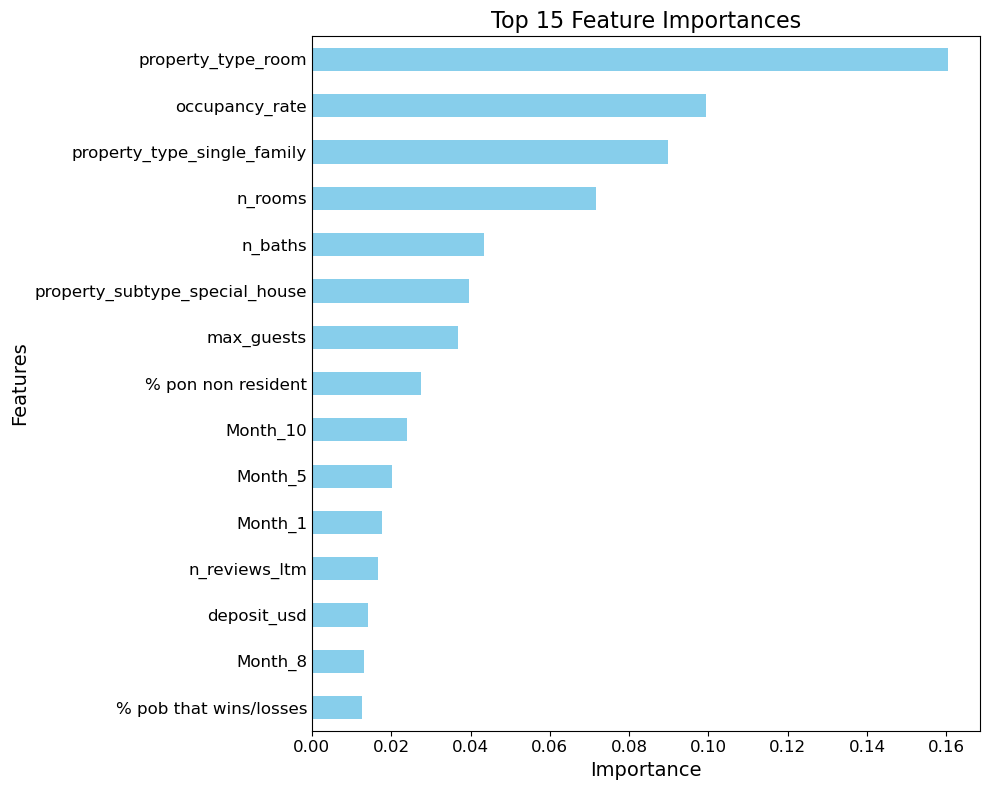

In [82]:
import matplotlib.pyplot as plt

# Assuming 'sorted_importance' is your Series with feature importances
plt.figure(figsize=(10, 8))  # Adjusted figure size
# Truncate or abbreviate long feature names
# Create the plot with adjusted feature names
plot = sorted_importance.head(15).plot(kind='barh', color='skyblue')

# Find the indices of specific feature names
feature_names = sorted_importance.head(15).index
index_1 = list(feature_names).index("Porcentaje de población no residente que se localiza durante el día en esta área (D*100/A)")
index_2 = list(feature_names).index("Porcentaje de población que gana o pierde durante el día (F*100/A)")

# Renaming specific y-axis labels
renamed_labels = ['% pob that wins/losses' if i == index_1 else '% pon non resident' if i == index_2 else label for i, label in enumerate(feature_names)]
plt.yticks(range(len(truncated_features)), renamed_labels, fontsize=12)

plt.gca().tick_params(axis='y', which='both', length=0)  # Remove tick marks
plt.title('Top 15 Feature Importances', fontsize=16)  # Adjusted title font size
plt.xlabel('Importance', fontsize=14)  # Adjusted x-axis label font size
plt.ylabel('Features', fontsize=14)  # Adjusted y-axis label font size
plt.xticks(fontsize=12)  # Adjusted tick label font size for x-axis
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest bar on top
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [113]:
df_sorted = df_with_dummies.sort_values(by='date_in')

# Extract the timestamps for train and test split
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Create train and test sets
train_set = df_sorted[df_sorted['date_in'] <= train_end_date]
test_set = df_sorted[df_sorted['date_in'] >= test_start_date]

# Feature selection
X_train = train_set.drop(columns=['adr_usd', 'date_in'])
y_train = train_set['adr_usd']
X_test = test_set.drop(columns=['adr_usd','date_in'])
y_test = test_set['adr_usd']

# Train XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Save the model using XGBoost's own serialization method
xgb_model.save_model("xgboost_model_adr.model")
print("Model saved successfully using XGBoost's built-in method.")

ADR model saved successfully in JSON format.


In [96]:
train_set.columns

Index(['date_in', 'n_rooms', 'n_baths', 'max_guests', 'deposit_usd',
       'cleaning_fee_usd', 'extra_people_fee_usd', 'min_stay', 'n_photos',
       'lat', 'lon', 'rating', 'occupancy_rate', 'adr_usd', 'n_bookings_ltm',
       'n_reviews_ltm', 'reservation_days_ltm', 'available_days_ltm',
       'anual_revenue_usd', 'blocked_days_ltm', 'occupancy_rate_ltm',
       'distance_to_closest_beach', 'Población residente (A)',
       'Población no residente que se localiza durante el día en esta área (D)',
       'Población total que se localiza durante el día en el área (E=B+D)',
       'Saldo población entra y sale de esta área (F=D-C)',
       'Porcentaje de población no residente que se localiza durante el día en esta área (D*100/A)',
       'Cociente entre población total que se localiza durante el día y población residente (E*100/A)',
       'Porcentaje de población que gana o pierde durante el día (F*100/A)',
       'is_instantbookable_False', 'is_instantbookable_True',
       'is_sup

+-----------------------------+-----------------+----------------+-----------+----------+--------------------+-------------------+----------------------+
| Model                       | Train R-squared | Test R-squared | Train MAE | Test MAE | Relative Train MAE | Relative Test MAE | Computation Time (s) |
+-----------------------------+-----------------+----------------+-----------+----------+--------------------+-------------------+----------------------+
| Linear Regression           | 0.3931          | 0.377          | 38.3722   | 40.5742  | 0.8406             | 0.8867            | 6.62                 |
| Lasso Regression            | 0.3927          | 0.3766         | 38.2964   | 40.4564  | 0.8389             | 0.8841            | 25.93                |
| Random Forest               | 0.9823          | 0.7409         | 3.2633    | 13.431   | 0.0715             | 0.2935            | 2321.04              |
| Histogram Gradient Boosting | 0.8044          | 0.7317         | 13.2388  

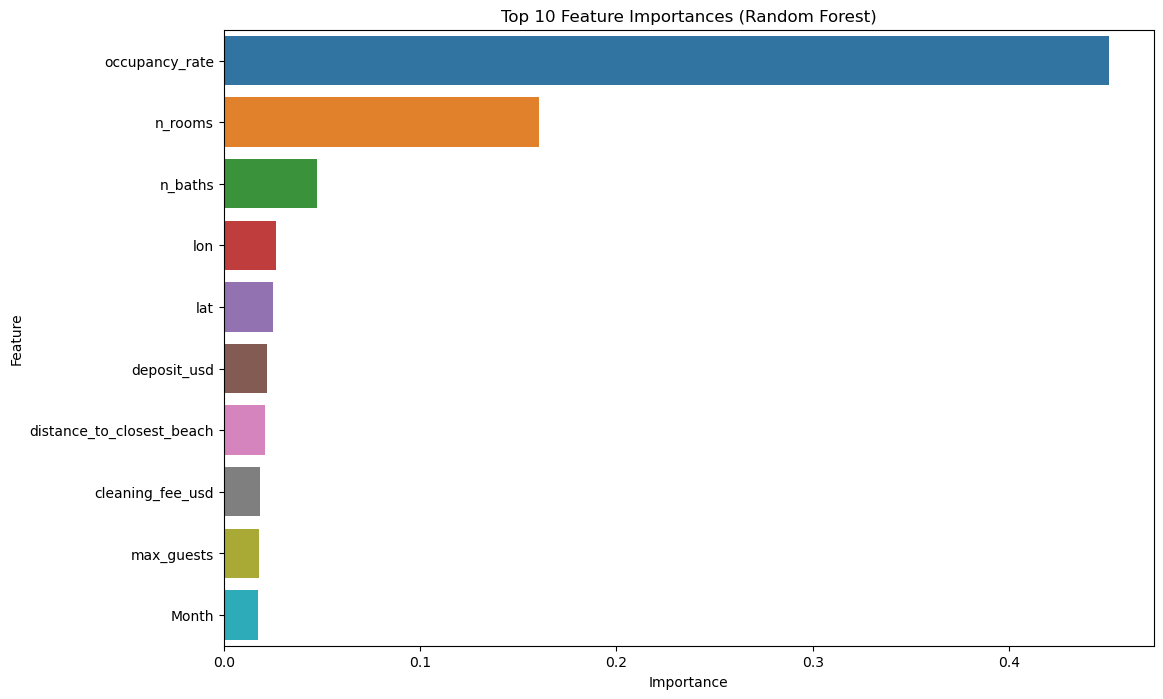

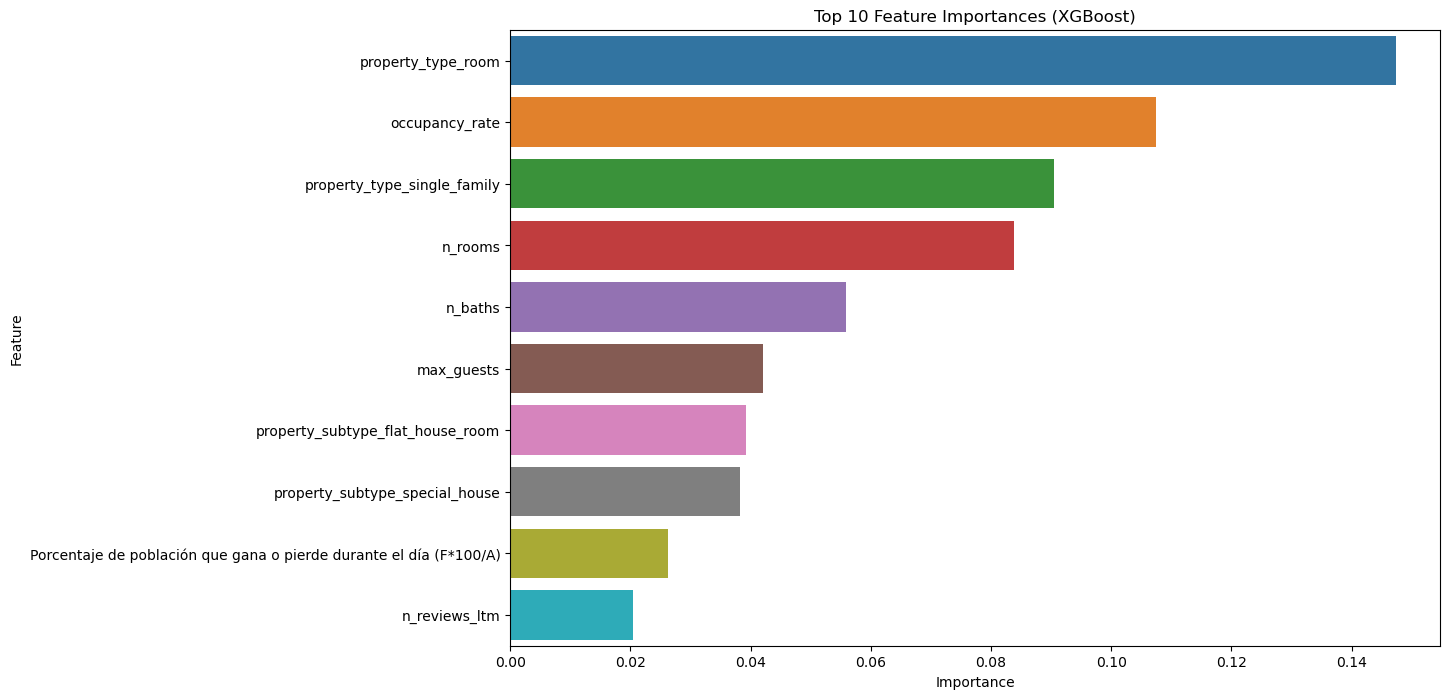

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from prettytable import PrettyTable
import time
import xgboost as xgb

# Assuming 'df' is your DataFrame
# Sort the DataFrame by 'date_in' in ascending order
df_sorted = df.sort_values(by='date_in')

# Extract the timestamps for train and test split
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Create train and test sets
train_set = df_sorted[df_sorted['date_in'] <= train_end_date]
test_set = df_sorted[df_sorted['date_in'] >= test_start_date]

# Feature selection
X_train_linear = train_set.drop(columns=['adr_usd','Province_y', 'Municipality_y', 'date_in', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'blocked_days', 'Municipality', 'supply_id'])
y_train_linear = train_set['adr_usd']
X_test_linear = test_set.drop(columns=['adr_usd','Province_y', 'Municipality_y', 'date_in', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'blocked_days', 'Municipality', 'supply_id'])
y_test_linear = test_set['adr_usd']

# Linear Regression
start_time = time.time()
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_linear, y_train_linear)
y_pred_train_linear = linear_reg_model.predict(X_train_linear)
y_pred_test_linear = linear_reg_model.predict(X_test_linear)
end_time = time.time()
elapsed_time_linear = end_time - start_time

# Lasso Regression
start_time = time.time()
scaler_lasso = StandardScaler()
X_train_lasso_scaled = scaler_lasso.fit_transform(X_train_linear)
X_test_lasso_scaled = scaler_lasso.transform(X_test_linear)
lasso_reg_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_reg_model.fit(X_train_lasso_scaled, y_train_linear)
y_pred_train_lasso = lasso_reg_model.predict(X_train_lasso_scaled)
y_pred_test_lasso = lasso_reg_model.predict(X_test_lasso_scaled)
end_time = time.time()
elapsed_time_lasso = end_time - start_time

# Random Forest
start_time = time.time()
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_linear, y_train_linear)
y_pred_train_rf = random_forest_model.predict(X_train_linear)
y_pred_test_rf = random_forest_model.predict(X_test_linear)
end_time = time.time()
elapsed_time_rf = end_time - start_time

# Histogram Gradient Boosting
start_time = time.time()
hist_model = HistGradientBoostingRegressor(random_state=42)
hist_model.fit(X_train_linear, y_train_linear)
y_pred_train_hist = hist_model.predict(X_train_linear)
y_pred_test_hist = hist_model.predict(X_test_linear)
end_time = time.time()
elapsed_time_hist = end_time - start_time

# XGBoost
start_time = time.time()
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_linear, y_train_linear)
y_pred_train_xgb = xgb_model.predict(X_train_linear)
y_pred_test_xgb = xgb_model.predict(X_test_linear)
end_time = time.time()
elapsed_time_xgb = end_time - start_time

# Calculate metrics for Linear Regression
r_squared_train_linear = r2_score(y_train_linear, y_pred_train_linear)
r_squared_test_linear = r2_score(y_test_linear, y_pred_test_linear)
mae_train_linear = mean_absolute_error(y_train_linear, y_pred_train_linear)
mae_test_linear = mean_absolute_error(y_test_linear, y_pred_test_linear)
relative_mae_train_linear = mae_train_linear / y_train_linear.mean()
relative_mae_test_linear = mae_test_linear / y_test_linear.mean()

# Calculate metrics for Lasso Regression
r_squared_train_lasso = r2_score(y_train_linear, y_pred_train_lasso)
r_squared_test_lasso = r2_score(y_test_linear, y_pred_test_lasso)
mae_train_lasso = mean_absolute_error(y_train_linear, y_pred_train_lasso)
mae_test_lasso = mean_absolute_error(y_test_linear, y_pred_test_lasso)
relative_mae_train_lasso = mae_train_lasso / y_train_linear.mean()
relative_mae_test_lasso = mae_test_lasso / y_test_linear.mean()

# Calculate metrics for Random Forest
r_squared_train_rf = r2_score(y_train_linear, y_pred_train_rf)
r_squared_test_rf = r2_score(y_test_linear, y_pred_test_rf)
mae_train_rf = mean_absolute_error(y_train_linear, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test_linear, y_pred_test_rf)
relative_mae_train_rf = mae_train_rf / y_train_linear.mean()
relative_mae_test_rf = mae_test_rf / y_test_linear.mean()

# Calculate metrics for Histogram Gradient Boosting
r_squared_train_hist = r2_score(y_train_linear, y_pred_train_hist)
r_squared_test_hist = r2_score(y_test_linear, y_pred_test_hist)
mae_train_hist = mean_absolute_error(y_train_linear, y_pred_train_hist)
mae_test_hist = mean_absolute_error(y_test_linear, y_pred_test_hist)
relative_mae_train_hist = mae_train_hist / y_train_linear.mean()
relative_mae_test_hist = mae_test_hist / y_test_linear.mean()

# Calculate metrics for XGBoost
r_squared_train_xgb = r2_score(y_train_linear, y_pred_train_xgb)
r_squared_test_xgb = r2_score(y_test_linear, y_pred_test_xgb)
mae_train_xgb = mean_absolute_error(y_train_linear, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test_linear, y_pred_test_xgb)
relative_mae_train_xgb = mae_train_xgb / y_train_linear.mean()
relative_mae_test_xgb = mae_test_xgb / y_test_linear.mean()

# Pretty Table
table = PrettyTable()
table.field_names = ["Model", "Train R-squared", "Test R-squared", "Train MAE", "Test MAE", "Relative Train MAE", "Relative Test MAE", "Computation Time (s)"]
table.align = 'l'

# Add data to the table
table.add_row(["Linear Regression", round(r_squared_train_linear, 4), round(r_squared_test_linear, 4), round(mae_train_linear, 4), round(mae_test_linear, 4), round(relative_mae_train_linear, 4), round(relative_mae_test_linear, 4), round(elapsed_time_linear, 2)])
table.add_row(["Lasso Regression", round(r_squared_train_lasso, 4), round(r_squared_test_lasso, 4), round(mae_train_lasso, 4), round(mae_test_lasso, 4), round(relative_mae_train_lasso, 4), round(relative_mae_test_lasso, 4), round(elapsed_time_lasso, 2)])
table.add_row(["Random Forest", round(r_squared_train_rf, 4), round(r_squared_test_rf, 4), round(mae_train_rf, 4), round(mae_test_rf, 4), round(relative_mae_train_rf, 4), round(relative_mae_test_rf, 4), round(elapsed_time_rf, 2)])
table.add_row(["Histogram Gradient Boosting", round(r_squared_train_hist, 4), round(r_squared_test_hist, 4), round(mae_train_hist, 4), round(mae_test_hist, 4), round(relative_mae_train_hist, 4), round(relative_mae_test_hist, 4), round(elapsed_time_hist, 2)])
table.add_row(["XGBoost", round(r_squared_train_xgb, 4), round(r_squared_test_xgb, 4), round(mae_train_xgb, 4), round(mae_test_xgb, 4), round(relative_mae_train_xgb, 4), round(relative_mae_test_xgb, 4), round(elapsed_time_xgb, 2)])

# Print the table
print(table)

# Feature Importance Plots
# Random Forest
feature_importances_rf = random_forest_model.feature_importances_
top_10_indices_rf = feature_importances_rf.argsort()[-10:][::-1]
top_10_features_rf = X_train_linear.columns[top_10_indices_rf]
top_10_importances_rf = feature_importances_rf[top_10_indices_rf]
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_importances_rf, y=top_10_features_rf)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# XGBoost
feature_importances_xgb = xgb_model.feature_importances_
top_10_indices_xgb = feature_importances_xgb.argsort()[-10:][::-1]
top_10_features_xgb = X_train_linear.columns[top_10_indices_xgb]
top_10_importances_xgb = feature_importances_xgb[top_10_indices_xgb]
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_importances_xgb, y=top_10_features_xgb)
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Predicting Occupancy

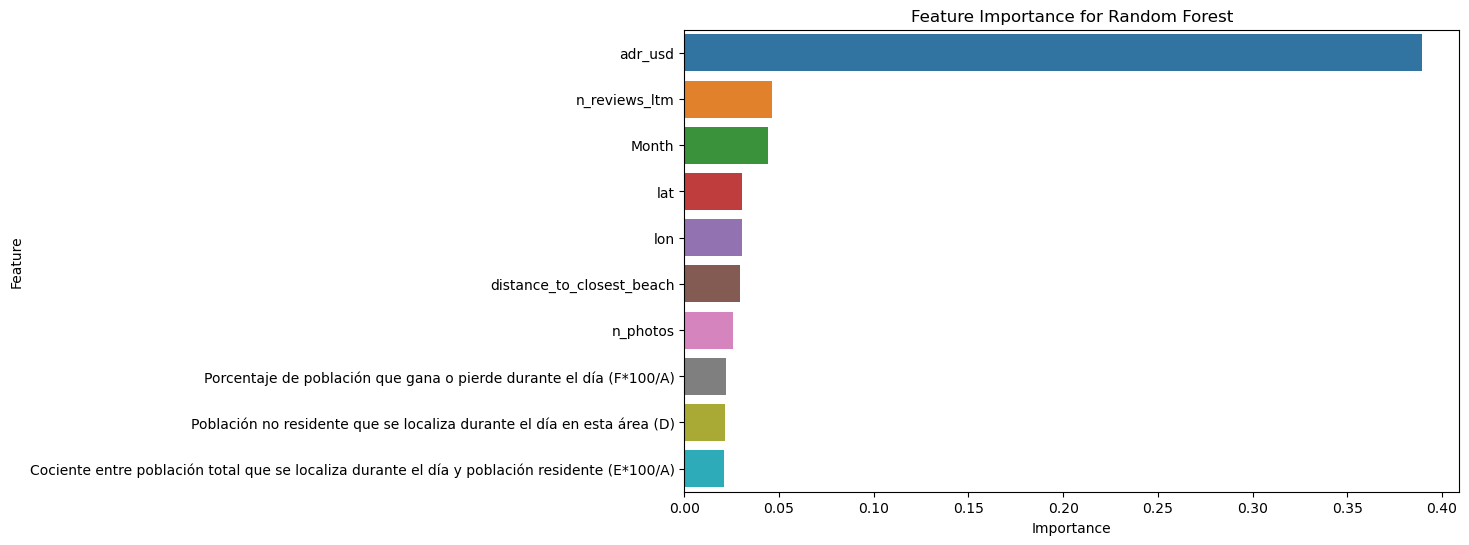

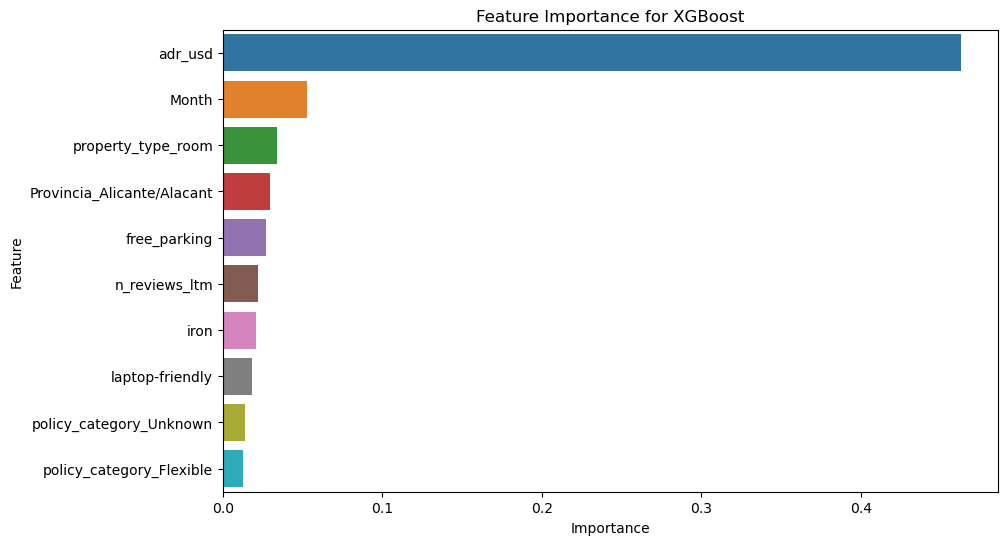

                                   Model  Train MAE  Test MAE  Train R^2  \
0                    Logistic Regression   0.227735  0.227508   0.245455   
1  Logistic Regression with MinMaxScaler   0.218990  0.223679   0.287409   
2                          Random Forest   0.047660  0.140910   0.938967   
3                                XGBoost   0.135571  0.137545   0.572714   

   Test R^2  Relative Train MAE  Relative Test MAE  Computation Time (s)  
0  0.256227            1.203356           1.194017            125.325377  
1  0.294351            1.157143           1.173917            112.655191  
2  0.497987            0.251834           0.739526            393.226462  
3  0.542334            0.716356           0.721867             12.327604  


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load data and preprocess
# Assuming df is your DataFrame
# Preprocess the DataFrame here

# Define train and test split dates
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Split the data
train_set = df[df['date_in'] <= train_end_date]
test_set = df[df['date_in'] >= test_start_date]

# Define features and target for training and test sets
X_train = train_set.drop(['occupancy_rate', 'Province_y', 'Municipality_y', 'date_in', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'blocked_days', 'Municipality', 'supply_id'], axis=1)
y_train = (train_set['occupancy_rate'] > 0.5).astype(int)
X_test = test_set.drop(['occupancy_rate', 'Province_y', 'Municipality_y', 'date_in', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'blocked_days', 'Municipality', 'supply_id'], axis=1)
y_test = (test_set['occupancy_rate'] > 0.5).astype(int)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Logistic Regression with MinMaxScaler': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each model
results = []
for model_name, model in models.items():
    start_time = time.time()
    
    # Scale features if required
    if 'MinMaxScaler' in model_name:
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict probabilities
    y_train_pred_prob = model.predict_proba(X_train_scaled)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    mae_train = mean_absolute_error(y_train, y_train_pred_prob)
    mae_test = mean_absolute_error(y_test, y_test_pred_prob)
    r2_train = r2_score(y_train, y_train_pred_prob)
    r2_test = r2_score(y_test, y_test_pred_prob)
    rmae_train = mae_train / y_train.mean()
    rmae_test = mae_test / y_test.mean()
    
    # Compute computation time
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Append results
    results.append({
        'Model': model_name,
        'Train MAE': mae_train,
        'Test MAE': mae_test,
        'Train R^2': r2_train,
        'Test R^2': r2_test,
        'Relative Train MAE': rmae_train,
        'Relative Test MAE': rmae_test,
        'Computation Time (s)': elapsed_time
    })
    
    # Plot feature importance for Random Forest and XGBoost
    if 'Random Forest' in model_name or 'XGBoost' in model_name:
        feature_importance = model.feature_importances_
        if 'Random Forest' in model_name:
            feature_names = X_train.columns
        elif 'XGBoost' in model_name:
            feature_names = list(X_train.columns)
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Select top 10 features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

# Display results
results_df = pd.DataFrame(results)
print(results_df)


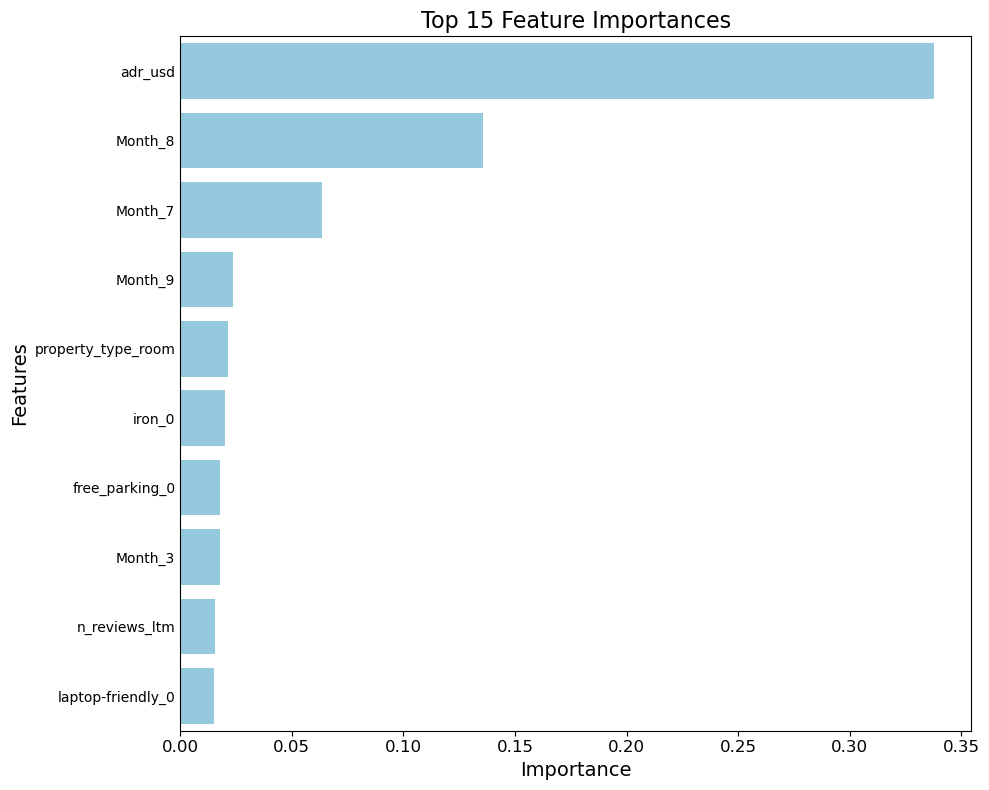

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Assuming df is your DataFrame
# Preprocess the DataFrame here

# Define train and test split dates
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Split the data
train_set = df_with_dummies[df_with_dummies['date_in'] <= train_end_date]
test_set = df_with_dummies[df_with_dummies['date_in'] >= test_start_date]

# Define features and target for training and test sets
X_train = train_set.drop(['occupancy_rate', 'date_in'], axis=1)
y_train = (train_set['occupancy_rate'] > 0.5).astype(int)
X_test = test_set.drop(['occupancy_rate', 'date_in'], axis=1)
y_test = (test_set['occupancy_rate'] > 0.5).astype(int)

# Model to evaluate (XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Scale features if required
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Select top 10 features

plt.figure(figsize=(10, 8))  # Adjusted figure size

# Plotting the bar plot with blue light color for all bars
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')

# Removing tick marks on y-axis
plt.gca().tick_params(axis='y', which='both', length=0)

# Setting the title with adjusted font size
plt.title('Top 15 Feature Importances', fontsize=16)

# Setting x-axis label with adjusted font size
plt.xlabel('Importance', fontsize=14)

# Setting y-axis label with adjusted font size
plt.ylabel('Features', fontsize=14)

# Adjusting tick label font size for x-axis
plt.xticks(fontsize=12)


# Adjusting layout to not cut off labels
plt.tight_layout()

# Displaying the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

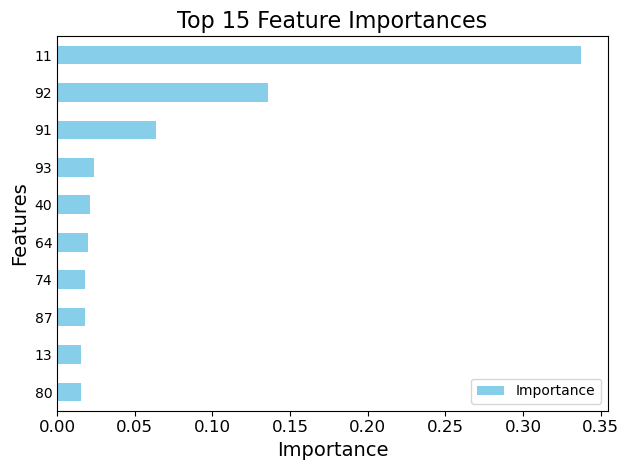

In [18]:
import matplotlib.pyplot as plt

# Assuming 'sorted_importance' is your Series with feature importances
plt.figure(figsize=(10, 8))  # Adjusted figure size
# Truncate or abbreviate long feature names
# Create the plot with adjusted feature names
plot = importance_df.head(15).plot(kind='barh', color='skyblue')

# Find the indices of specific feature names
feature_names = importance_df.head(15).index


plt.gca().tick_params(axis='y', which='both', length=0)  # Remove tick marks
plt.title('Top 15 Feature Importances', fontsize=16)  # Adjusted title font size
plt.xlabel('Importance', fontsize=14)  # Adjusted x-axis label font size
plt.ylabel('Features', fontsize=14)  # Adjusted y-axis label font size
plt.xticks(fontsize=12)  # Adjusted tick label font size for x-axis
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest bar on top
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [ ]:
# Create a PrettyTable instance
table = PrettyTable()

# Define the column names and alignment
table.field_names = ["Model", "Train MAE", "Test MAE", "Train R^2", "Test R^2", "Relative Train MAE", "Relative Test MAE", "Computation Time (s)"]
table.align = 'l'

# Add data to the table
table.add_row(["Linear Regression", round(mae_train_linear, 4), round(mae_test_linear, 4), round(r_squared_train_linear, 4), round(r_squared_test_linear, 4), round(relative_mae_train_linear, 4), round(relative_mae_test_linear, 4), round(elapsed_time_linear, 2)])
table.add_row(["Lasso Regression", round(mae_train_lasso, 4), round(mae_test_lasso, 4), round(r_squared_train_lasso, 4), round(r_squared_test_lasso, 4), round(relative_mae_train_lasso, 4), round(relative_mae_test_lasso, 4), round(elapsed_time_lasso, 2)])
table.add_row(["Random Forest", round(mae_train_rf, 4), round(mae_test_rf, 4), round(r_squared_train_rf, 4), round(r_squared_test_rf, 4), round(relative_mae_train_rf, 4), round(relative_mae_test_rf, 4), round(elapsed_time_rf, 2)])
table.add_row(["Histogram Gradient Boosting", round(mae_train_hist, 4), round(mae_test_hist, 4), round(r_squared_train_hist, 4), round(r_squared_test_hist, 4), round(relative_mae_train_hist, 4), round(relative_mae_test_hist, 4), round(elapsed_time_hist, 2)])
table.add_row(["XGBoost", round(mae_train_xgb, 4), round(mae_test_xgb, 4), round(r_squared_train_xgb, 4), round(r_squared_test_xgb, 4), round(relative_mae_train_xgb, 4), round(relative_mae_test_xgb, 4), round(elapsed_time_xgb, 2)])

# Set column colors
table.field_names = [f'\033[1m{x}\033[0m' for x in table.field_names]

# Print the table
print(table)


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle

# Load your data into DataFrame 'df'
# df = pd.read_csv('path_to_your_csv_file.csv')

# Assuming df is already loaded and preprocessed
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Split the data
train_set = df_with_dummies[df_with_dummies['date_in'] <= train_end_date]
test_set = df_with_dummies[df_with_dummies['date_in'] >= test_start_date]

# Define features and target for training and test sets
X_train = train_set.drop(['occupancy_rate', 'date_in'], axis=1)
y_train = (train_set['occupancy_rate'] > 0.5).astype(int)
X_test = test_set.drop(['occupancy_rate', 'date_in'], axis=1)
y_test = (test_set['occupancy_rate'] > 0.5).astype(int)

# Initialize and fit XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Save the model to a pickle file
pickle_filename = "xgboost_model_occupancy_rate.pkl"
with open(pickle_filename, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved to {pickle_filename}')

Occupancy rate model saved successfully in JSON format.


Training Metrics with Elastic Net regularization:
Accuracy: 0.8397
Confusion Matrix:
[[61373  4951]
 [ 8060  6785]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     66324
           1       0.58      0.46      0.51     14845

    accuracy                           0.84     81169
   macro avg       0.73      0.69      0.71     81169
weighted avg       0.83      0.84      0.83     81169

R-squared: 0.3298
Mean Absolute Error: 0.1929

Testing Metrics with Elastic Net regularization:
Accuracy: 0.8222
Confusion Matrix:
[[30082  2848]
 [ 4663  4657]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     32930
           1       0.62      0.50      0.55      9320

    accuracy                           0.82     42250
   macro avg       0.74      0.71      0.72     42250
weighted avg       0.81      0.82      0.82     42250

R-squared: 0.3534
Mean

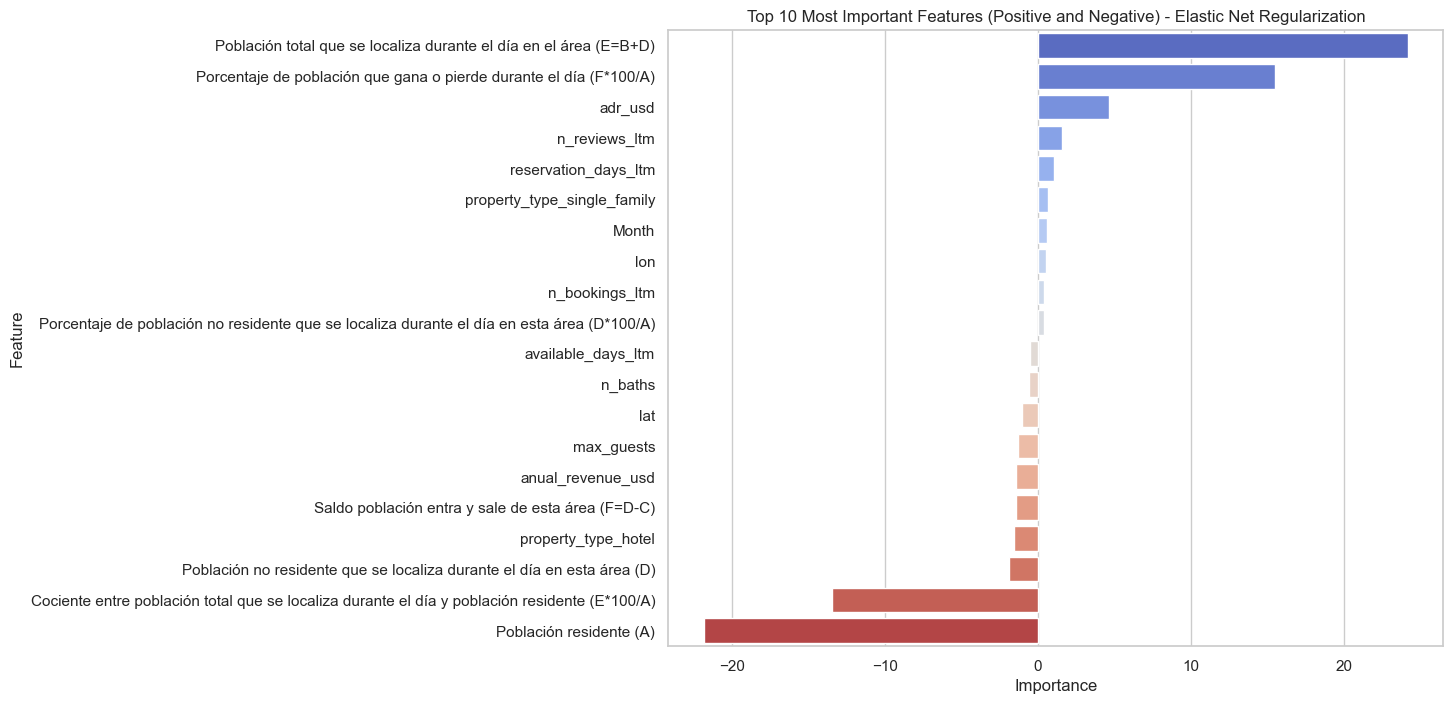

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your original DataFrame and 'date_in' is the column with timestamps

# Sort the DataFrame by 'date_in' in ascending order if not already sorted
df_sorted = df.sort_values(by='date_in')

# Calculate indices for a 5% sample, maintaining chronological order
np.random.seed(42)  # Ensure reproducibility
sample_indices = np.random.choice(df_sorted.index, size=int(len(df_sorted) * 0.05), replace=False)
sample_indices.sort()  # Sort the indices to maintain chronological order
df_sampled = df_sorted.loc[sample_indices]

# Continue with your process using df_sampled

# Extract the timestamps for train and test split
train_end_date = '2019-03-31'
test_start_date = '2019-04-01'

# Create train and test sets
train_set = df_sampled[df_sampled['date_in'] <= train_end_date]
test_set = df_sampled[df_sampled['date_in'] >= test_start_date]

# Extract features and target variable
X_train = train_set.drop(['occupancy_rate','Province_y', 'Municipality_y', 'date_in', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd'], axis=1)
y_train = (train_set['occupancy_rate'] > 0.5).astype(int)

X_test = test_set.drop(['occupancy_rate','Province_y', 'Municipality_y', 'date_in', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd'], axis=1)
y_test = (test_set['occupancy_rate'] > 0.5).astype(int)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with Elastic Net regularization
log_reg_en = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5], cv=5)

# Fit the model on the scaled training data
log_reg_en.fit(X_train_scaled, y_train)

# Predict the classes and probabilities on the training set
y_train_pred_classes_en = log_reg_en.predict(X_train_scaled)
y_train_pred_probabilities_en = log_reg_en.predict_proba(X_train_scaled)[:, 1]  # Probability of class 1

# Predict the classes and probabilities on the test set
y_test_pred_classes_en = log_reg_en.predict(X_test_scaled)
y_test_pred_probabilities_en = log_reg_en.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Evaluate the model on the training set
train_accuracy_en = accuracy_score(y_train, y_train_pred_classes_en)
train_conf_matrix_en = confusion_matrix(y_train, y_train_pred_classes_en)
train_classification_rep_en = classification_report(y_train, y_train_pred_classes_en)
train_r_squared_en = r2_score(y_train, y_train_pred_probabilities_en)
train_mae_en = mean_absolute_error(y_train, y_train_pred_probabilities_en)

# Evaluate the model on the test set
test_accuracy_en = accuracy_score(y_test, y_test_pred_classes_en)
test_conf_matrix_en = confusion_matrix(y_test, y_test_pred_classes_en)
test_classification_rep_en = classification_report(y_test, y_test_pred_classes_en)
test_r_squared_en = r2_score(y_test, y_test_pred_probabilities_en)
test_mae_en = mean_absolute_error(y_test, y_test_pred_probabilities_en)

# Display results for both training and testing sets with Elastic Net regularization
print("Training Metrics with Elastic Net regularization:")
print(f"Accuracy: {train_accuracy_en:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix_en)
print("Classification Report:")
print(train_classification_rep_en)
print(f"R-squared: {train_r_squared_en:.4f}")
print(f"Mean Absolute Error: {train_mae_en:.4f}")

print("\nTesting Metrics with Elastic Net regularization:")
print(f"Accuracy: {test_accuracy_en:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix_en)
print("Classification Report:")
print(test_classification_rep_en)
print(f"R-squared: {test_r_squared_en:.4f}")
print(f"Mean Absolute Error: {test_mae_en:.4f}")

# Get feature importance (coefficients) from the logistic regression model with Elastic Net regularization
feature_importance_en = log_reg_en.coef_[0]

# Create a DataFrame to store feature names and their corresponding importance
feature_importance_df_en = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_en})

# Sort the DataFrame by importance in descending order
feature_importance_df_en = feature_importance_df_en.sort_values(by='Importance', ascending=False)

# Separate positive and negative coefficients
positive_coeffs_en = feature_importance_df_en[feature_importance_df_en['Importance'] > 0].head(10)
negative_coeffs_en = feature_importance_df_en[feature_importance_df_en['Importance'] < 0].tail(10)

# Concatenate positive and negative coefficients
top_10_features_en = pd.concat([positive_coeffs_en, negative_coeffs_en])

# Set up the plotting style
sns.set(style="whitegrid")

# Plotting the top 10 important features (both positive and negative)
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_features_en, x='Importance', y='Feature', palette='coolwarm')
plt.title('Top 10 Most Important Features (Positive and Negative) - Elastic Net Regularization')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [201]:
# Define a function to simulate occupancy rate changes and predict ADR values
def simulate_occupancy_rate_effect(model, X_test, base_occupancy_rate):
    # Create DataFrame to store results
    results = pd.DataFrame(columns=['Base Occupancy Rate (%)', 'Change in Occupancy Rate (%)', 'Actual Occupancy Rate (%)', 'Predicted ADR (USD)'])

    # Simulate changes in occupancy rate
    occupancy_rate_changes = [-0.1, 0.1, 0.2, 0.4, 0.6]  # Define the changes you want to simulate
    for change in occupancy_rate_changes:
        simulated_data = X_test.copy()
        simulated_data['occupancy_rate'] = base_occupancy_rate + change
        actual_occupancy_rate = simulated_data['occupancy_rate'].mean()  # Get the actual occupancy rate used
        simulated_data_scaled = scaler_lasso.transform(simulated_data)  # Scale simulated data
        predicted_adr = model.predict(simulated_data_scaled)
        results.loc[len(results)] = [base_occupancy_rate, change * 100, actual_occupancy_rate, predicted_adr.mean()]

    return results

# Define base occupancy rate for simulation
base_occupancy_rate = df['occupancy_rate'].mean()  # Adjust as needed

# Simulate occupancy rate changes and predict ADR values
occupancy_rate_effect_results_lasso = simulate_occupancy_rate_effect(lasso_reg_model, X_test_linear, base_occupancy_rate)

# Print results
print("Occupancy Rate Effect Simulation Results (Lasso Regression):\n")
print(occupancy_rate_effect_results_lasso.to_string(index=False))


Occupancy Rate Effect Simulation Results (Lasso Regression):

 Base Occupancy Rate (%)  Change in Occupancy Rate (%)  Actual Occupancy Rate (%)  Predicted ADR (USD)
                0.196185                         -10.0                   0.096185            27.315834
                0.196185                          10.0                   0.296185            50.586346
                0.196185                          20.0                   0.396185            62.221603
                0.196185                          40.0                   0.596185            85.492115
                0.196185                          60.0                   0.796185           108.762627


In [109]:
from sklearn.ensemble import RandomForestRegressor

# Define a function to simulate occupancy rate changes and predict ADR values
def simulate_occupancy_rate_effect(model, X_test, base_occupancy_rate):
    # Create DataFrame to store results
    results = pd.DataFrame(columns=['Base Occupancy Rate', 'Predicted ADR'])

    # Predict ADR values for base occupancy rate
    base_test_data = X_test.copy()
    base_test_data['occupancy_rate'] = base_occupancy_rate
    base_predicted_adr = model.predict(base_test_data)

    # Simulate changes in occupancy rate
    occupancy_rate_changes = [-0.1, 0.1, 0.2, 0.4, 0.6]  # Define the changes you want to simulate
    for change in occupancy_rate_changes:
        simulated_data = X_test.copy()
        simulated_data['occupancy_rate'] = base_occupancy_rate + change
        predicted_adr = model.predict(simulated_data)
        results.loc[f'Change_{change}'] = [base_occupancy_rate + change, predicted_adr.mean()]

    return results

# Get the actual occupancy rate from the test set
base_occupancy_rate = X_test_rf['occupancy_rate'].mean()  # Assuming 'occupancy_rate' is the correct column name

# Simulate occupancy rate changes and predict ADR values
occupancy_rate_effect_results_rf = simulate_occupancy_rate_effect(random_forest_model, X_test_rf, base_occupancy_rate)

# Print results
print("Occupancy Rate Effect Simulation Results (Random Forest):")
print(occupancy_rate_effect_results_rf)



Occupancy Rate Effect Simulation Results (Random Forest):
             Base Occupancy Rate  Predicted ADR
Change_-0.1             0.117241     102.380564
Change_0.1              0.317241     100.610306
Change_0.2              0.417241     100.294704
Change_0.4              0.617241      99.840814
Change_0.6              0.817241      99.457974


In [36]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

# Assuming xgb_clf is your trained XGBClassifier model
# and test_set is your prepared DataFrame

# Make copies of the test set for different ADR scenarios
test_set_doubled_adr = test_set.copy()
test_set_divided_adr = test_set.copy()

# Modify adr_usd values by doubling and dividing by 2
test_set_doubled_adr['adr_usd'] *= 2
test_set_divided_adr['adr_usd'] /= 2

# Define a function to predict occupancy rates
def predict_occupancy_rate(data):
    features = data.drop(['occupancy_rate', 'Province_y', 'Municipality_y', 'date_in', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'blocked_days',  'Municipality', 'supply_id'], axis=1)
    predicted_occupancy = xgb_clf.predict_proba(features)[:, 1]  # Assuming the positive class is at index 1
    return np.mean(predicted_occupancy)

# Predict occupancy rates for each scenario
mean_pred_occupancy_unchanged_adr = predict_occupancy_rate(test_set)
mean_pred_occupancy_doubled_adr = predict_occupancy_rate(test_set_doubled_adr)
mean_pred_occupancy_divided_adr = predict_occupancy_rate(test_set_divided_adr)

# Calculate mean ADR values for each scenario
mean_adr_unchanged = test_set['adr_usd'].mean()
mean_adr_doubled = test_set_doubled_adr['adr_usd'].mean()
mean_adr_divided = test_set_divided_adr['adr_usd'].mean()

# Prepare data for the results table
data = {
    "Scenario": ["Unchanged", "Doubled", "Divided by 2"],
    "Mean ADR Used ($)": [mean_adr_unchanged, mean_adr_doubled, mean_adr_divided],
    "Predicted Occupancy Rate": [mean_pred_occupancy_unchanged_adr, mean_pred_occupancy_doubled_adr, mean_pred_occupancy_divided_adr]
}

# Create and display the results DataFrame
results_df = pd.DataFrame(data)
print(results_df)



       Scenario  Mean ADR Used ($)  Predicted Occupancy Rate
0     Unchanged          54.016541                  0.395856
1       Doubled         108.033082                  0.309886
2  Divided by 2          27.008270                  0.451376


In [57]:
import pandas as pd
from xgboost import XGBRegressor

def simulate_occupancy_rate_effect_xgb(model, X_test, occupancy_rate_changes):
    # Initialize lists to store results
    changes_in_occupancy_rate = []
    predicted_adr_values = []
    average_occupancy_rates = []

    # Iterate over specified changes in occupancy rate
    for change in occupancy_rate_changes:
        # Modify each occupancy rate by the specified change
        simulated_data = X_test.copy()
        if 'occupancy_rate' in simulated_data.columns:
            simulated_data['occupancy_rate'] *= (1 + change)  # Adjusting each occupancy rate
        
            # Predict ADR using the modified data
            predicted_adr = model.predict(simulated_data)

            # Store the results
            changes_in_occupancy_rate.append(change * 100)
            predicted_adr_values.append(predicted_adr.mean())
            average_occupancy_rates.append(simulated_data['occupancy_rate'].mean())

    # Create a DataFrame from the stored results
    results = pd.DataFrame({
        'Change in Occupancy Rate (%)': changes_in_occupancy_rate,
        'Average Simulated Occupancy Rate (%)': average_occupancy_rates,
        'Predicted ADR (USD)': predicted_adr_values
    })

    return results

# Define changes in occupancy rate to simulate
occupancy_rate_changes = [0, -1, -0.8, -0.5, -0.35, -0.2, 0.3, 0.8, 1.4, 1.9, 2.3, 2.8, 3.3]

# Initialize the XGBRegressor with random state for reproducibility
xgb_model = XGBRegressor(random_state=42)

# Assuming X_train, y_train, and X_test are already defined and prepared
xgb_model.fit(X_train, y_train)

# Run the simulation function with the trained model and test data
occupancy_rate_effect_results_xgb = simulate_occupancy_rate_effect_xgb(xgb_model, X_test, occupancy_rate_changes)

# Print the simulation results
print("Occupancy Rate Effect Simulation Results (XGBoost):\n")
print(occupancy_rate_effect_results_xgb.to_string(index=False))


Occupancy Rate Effect Simulation Results (XGBoost):

 Change in Occupancy Rate (%)  Average Simulated Occupancy Rate (%)  Predicted ADR (USD)
                          0.0                              0.216094            41.227325
                       -100.0                              0.000000             0.085605
                        -80.0                              0.043219            36.981915
                        -50.0                              0.108047            40.155834
                        -35.0                              0.140461            39.917892
                        -20.0                              0.172875            39.641632
                         30.0                              0.280922            40.847897
                         80.0                              0.388969            40.552826
                        140.0                              0.518626            40.291462
                        190.0                            

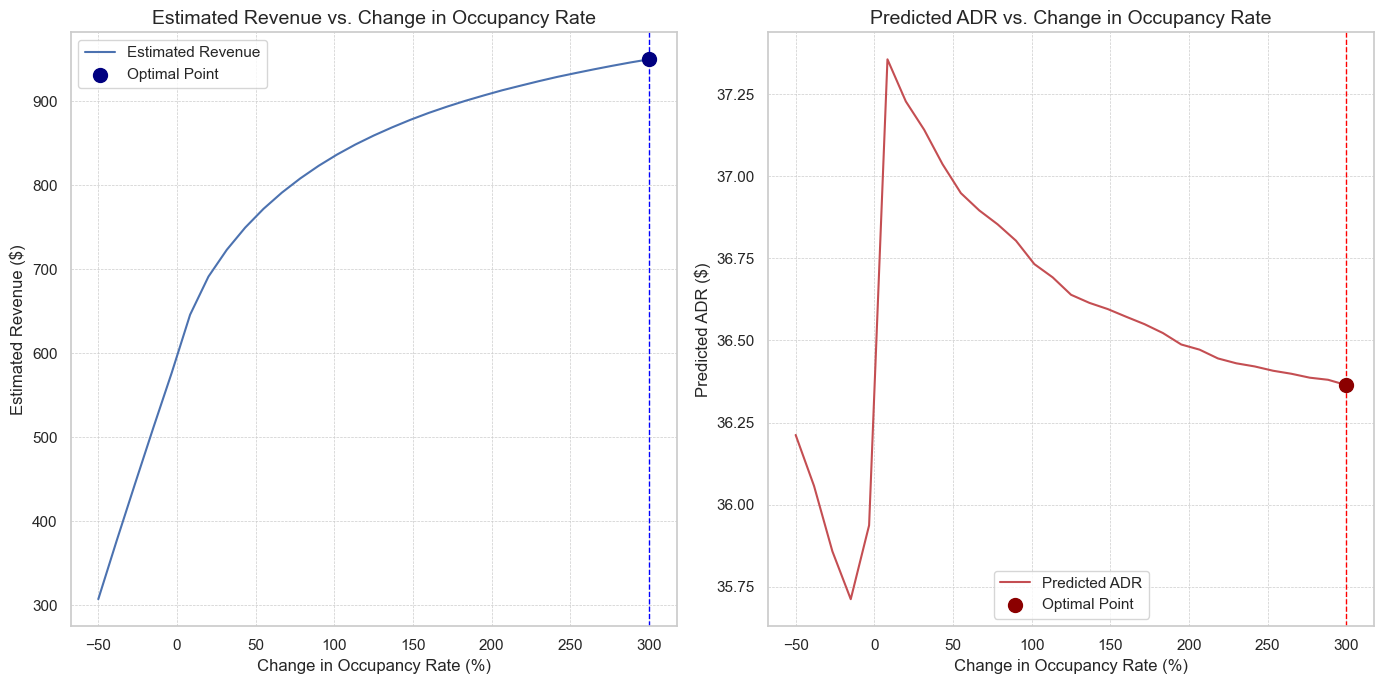

Optimal occupancy rate change for maximizing estimated revenue:
Change in Occupancy Rate (%)    300.000000
Predicted ADR ($)                36.364010
Estimated Revenue ($)           949.764692
Name: 30, dtype: float64


In [67]:
def simulate_occupancy_effect_and_plot_separately_reordered(model, X_test, occupancy_rate_changes, total_days=30):
    changes_in_occupancy_rate = []
    estimated_revenues = []
    average_predicted_adrs = []

    for change in occupancy_rate_changes:
        simulated_data = X_test.copy()
        simulated_data['occupancy_rate'] = np.clip(simulated_data['occupancy_rate'] * (1 + change), 0, 1)
        
        predicted_adr = model.predict(simulated_data)
        average_predicted_adr = np.mean(predicted_adr)
        
        estimated_revenue = predicted_adr * simulated_data['occupancy_rate'] * total_days
        average_estimated_revenue = np.mean(estimated_revenue)
        
        changes_in_occupancy_rate.append(change * 100)  # Convert change to percentage
        estimated_revenues.append(average_estimated_revenue)
        average_predicted_adrs.append(average_predicted_adr)
    
    # Find the optimal occupancy rate change
    optimal_index = np.argmax(estimated_revenues)
    optimal_change = changes_in_occupancy_rate[optimal_index]
    
    # Plotting Estimated Revenue
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(changes_in_occupancy_rate, estimated_revenues, 'b-', label='Estimated Revenue')
    plt.scatter(optimal_change, estimated_revenues[optimal_index], color='navy', s=100, label='Optimal Point', zorder=5)
    plt.title('Estimated Revenue vs. Change in Occupancy Rate', fontsize=14)
    plt.xlabel('Change in Occupancy Rate (%)', fontsize=12)
    plt.ylabel('Estimated Revenue ($)', fontsize=12)
    plt.axvline(optimal_change, color='blue', linestyle='--', lw=1)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Plotting Predicted ADR
    plt.subplot(1, 2, 2)
    plt.plot(changes_in_occupancy_rate, average_predicted_adrs, 'r-', label='Predicted ADR')
    plt.scatter(optimal_change, average_predicted_adrs[optimal_index], color='darkred', s=100, label='Optimal Point', zorder=5)
    plt.title('Predicted ADR vs. Change in Occupancy Rate', fontsize=14)
    plt.xlabel('Change in Occupancy Rate (%)', fontsize=12)
    plt.ylabel('Predicted ADR ($)', fontsize=12)
    plt.axvline(optimal_change, color='red', linestyle='--', lw=1)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

    return pd.DataFrame({
        'Change in Occupancy Rate (%)': changes_in_occupancy_rate,
        'Predicted ADR ($)': average_predicted_adrs,
        'Estimated Revenue ($)': estimated_revenues
    })

# Define the changes in occupancy rate to simulate
occupancy_rate_changes = np.linspace(-0.5, 3.0, 31)  # Adjusting range for -50% up to +100%

# Ensure xgb_model is your trained model and X_test is prepared
# Call the function with your XGBRegressor model and test data
results_df = simulate_occupancy_effect_and_plot_separately_reordered(xgb_model, X_test, occupancy_rate_changes, total_days=30)

print("Optimal occupancy rate change for maximizing estimated revenue:")
print(results_df.loc[results_df['Estimated Revenue ($)'].idxmax()])


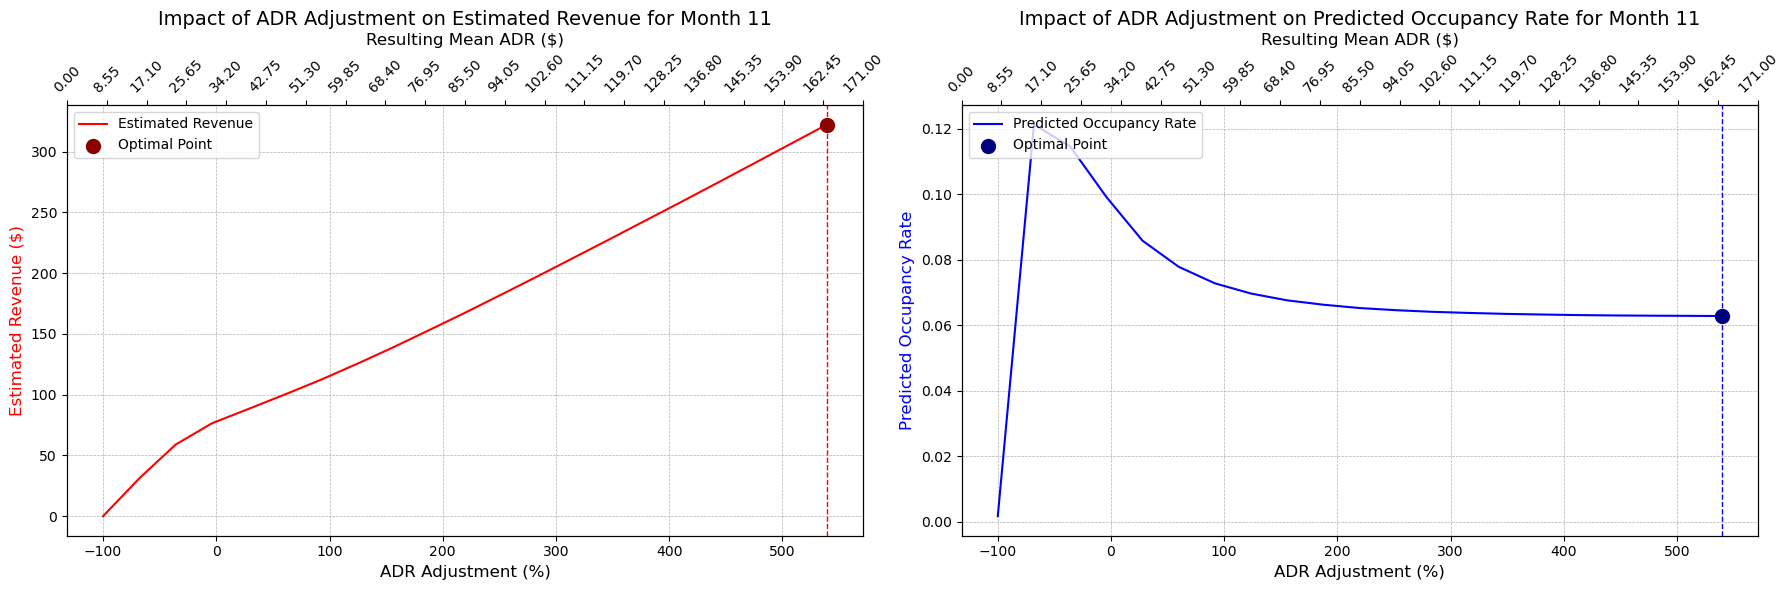

Optimal ADR Adjustment for Month 11: 539.29%
Associated Occupancy Rate for Month 11: 0.06
Total Revenue Generated for Month 11: $322.20 for 30 days.


In [100]:
def estimate_revenue_occupancy_and_plot_percentages_by_month(X_test, xgb_clf, month, total_days=30):
    X_month = X_test[X_test['Month'] == month]
    
    # Calculate the min, max, and avg ADR from the month-specific dataset
    min_adr = X_month['adr_usd'].min()
    max_adr = X_month['adr_usd'].max()
    avg_adr = X_month['adr_usd'].mean()
    
    # Determine the percentage changes relative to the avg ADR
    min_percentage_change = (min_adr - avg_adr) / avg_adr
    max_percentage_change = (max_adr - avg_adr) / avg_adr
    
    # Generate percentage changes between the calculated min and max
    percentage_changes = np.linspace(min_percentage_change, max_percentage_change, 21)
    estimated_revenues = []
    predicted_occupancy_rates = []
    mean_adrs = []  # Store mean ADRs after applying percentage changes
    
    for percentage_change in percentage_changes:
        X_temp = X_month.copy()
        X_temp['adr_usd'] *= (1 + percentage_change)
        mean_adrs.append(X_temp['adr_usd'].mean())
        
        predicted_occupancy = xgb_clf.predict_proba(X_temp)[:, 1]
        mean_predicted_occupancy = np.mean(predicted_occupancy)
        
        estimated_revenue = mean_predicted_occupancy * X_temp['adr_usd'].mean() * total_days
        estimated_revenues.append(estimated_revenue)
        predicted_occupancy_rates.append(mean_predicted_occupancy)
    
    optimal_index = np.argmax(estimated_revenues)
    optimal_adr_adjustment = percentage_changes[optimal_index] * 100  # Convert to percentage
    optimal_occupancy_rate = predicted_occupancy_rates[optimal_index]
    max_revenue = estimated_revenues[optimal_index]

    # Enhanced plotting function, placing plots side by side
    plt.figure(figsize=(18, 6))

    # Revenue Plot
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(percentage_changes * 100, estimated_revenues, 'r-', label='Estimated Revenue')
    ax1.scatter(optimal_adr_adjustment, max_revenue, color='darkred', s=100, label='Optimal Point', zorder=5)
    ax1.set_title(f'Impact of ADR Adjustment on Estimated Revenue for Month {month}', fontsize=14)
    ax1.set_xlabel('ADR Adjustment (%)', fontsize=12)
    ax1.set_ylabel('Estimated Revenue ($)', fontsize=12, color='r')
    ax1.axvline(optimal_adr_adjustment, color='red', linestyle='--', lw=1)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax1.legend(loc='upper left')
    
    # Secondary x-axis for ADR values on the Revenue Plot
    ax1_secondary = ax1.twiny()
    ax1_secondary.set_xticks(percentage_changes * 100)
    ax1_secondary.set_xticklabels([f"{x:.2f}" for x in mean_adrs], rotation=45)
    ax1_secondary.set_xlabel('Resulting Mean ADR ($)', fontsize=12)
    ax1_secondary.xaxis.set_ticks_position('top')  # Set the position of the second x-axis to top
    ax1_secondary.xaxis.set_label_position('top')

    # Occupancy Rate Plot
    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(percentage_changes * 100, predicted_occupancy_rates, 'b-', label='Predicted Occupancy Rate')
    ax2.scatter(optimal_adr_adjustment, optimal_occupancy_rate, color='navy', s=100, label='Optimal Point', zorder=5)
    ax2.set_title(f'Impact of ADR Adjustment on Predicted Occupancy Rate for Month {month}', fontsize=14)
    ax2.set_xlabel('ADR Adjustment (%)', fontsize=12)
    ax2.set_ylabel('Predicted Occupancy Rate', fontsize=12, color='b')
    ax2.axvline(optimal_adr_adjustment, color='blue', linestyle='--', lw=1)
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax2.legend(loc='upper left')
    
    # Secondary x-axis for ADR values on the Occupancy Rate Plot
    ax2_secondary = ax2.twiny()
    ax2_secondary.set_xticks(percentage_changes * 100)
    ax2_secondary.set_xticklabels([f"{x:.2f}" for x in mean_adrs], rotation=45)
    ax2_secondary.set_xlabel('Resulting Mean ADR ($)', fontsize=12)
    ax2_secondary.xaxis.set_ticks_position('top')  # Set the position of the second x-axis to top
    ax2_secondary.xaxis.set_label_position('top')

    plt.tight_layout()
    plt.show()

    print(f"Optimal ADR Adjustment for Month {month}: {optimal_adr_adjustment:.2f}%")
    print(f"Associated Occupancy Rate for Month {month}: {optimal_occupancy_rate:.2f}")
    print(f"Total Revenue Generated for Month {month}: ${max_revenue:.2f} for {total_days} days.")


estimate_revenue_occupancy_and_plot_percentages_by_month(X_test, xgb_clf, 11, total_days=30)

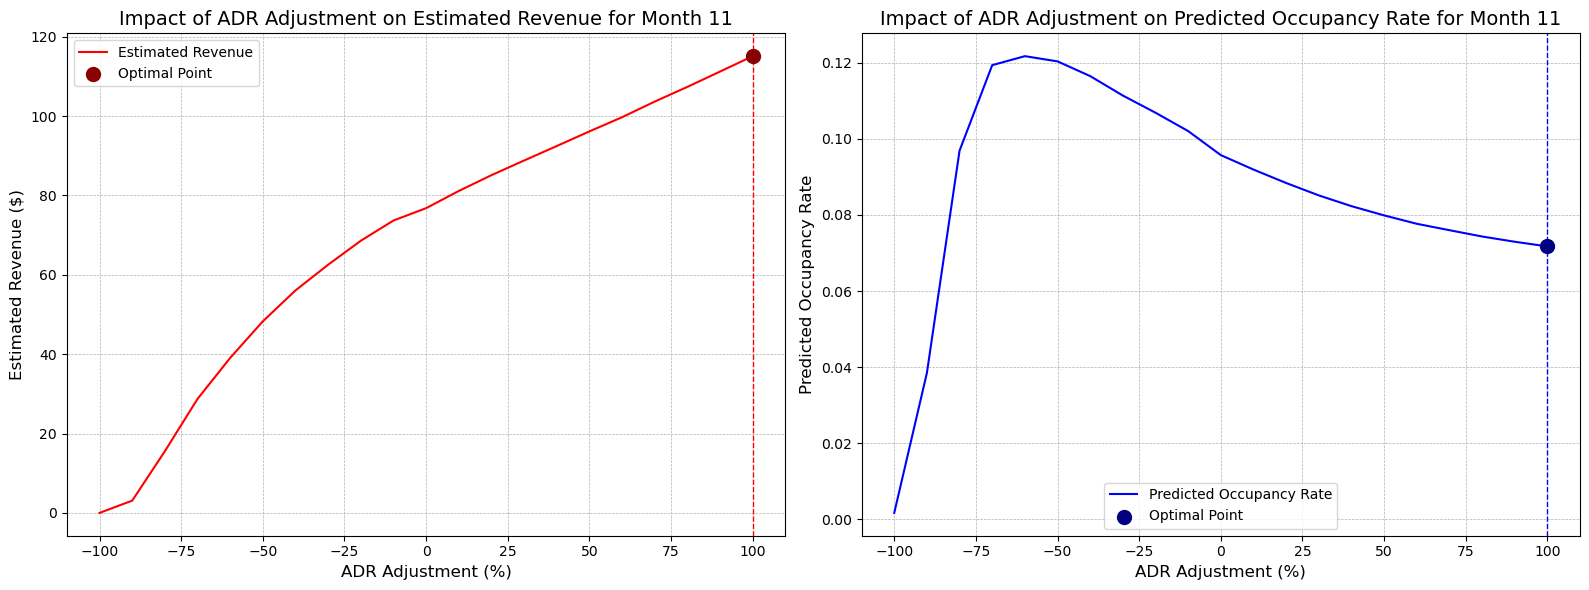

Optimal ADR Adjustment for Month 11: 100.00%
Associated Occupancy Rate for Month 11: 0.07
Total Revenue Generated for Month 11: $115.12 for 30 days.


In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

def estimate_revenue_occupancy_and_plot_percentages_by_month(X_test, xgb_clf, month, total_days=30):
    # Filter X_test for entries corresponding to the specified month
    X_month = X_test[X_test['Month'] == month]
    
    percentage_changes = np.linspace(-1, 1, 21)  # From -2.5% to +2.5% in increments
    estimated_revenues = []
    predicted_occupancy_rates = []
    
    for percentage_change in percentage_changes:
        X_temp = X_month.copy()
        X_temp['adr_usd'] *= (1 + percentage_change)

        predicted_occupancy = xgb_clf.predict_proba(X_temp)[:, 1]
        mean_predicted_occupancy = np.mean(predicted_occupancy)

        estimated_revenue = mean_predicted_occupancy * X_temp['adr_usd'].mean() * total_days
        estimated_revenues.append(estimated_revenue)
        predicted_occupancy_rates.append(mean_predicted_occupancy)
    
    optimal_index = np.argmax(estimated_revenues)
    optimal_adr_adjustment = percentage_changes[optimal_index] * 100  # Convert to percentage
    optimal_occupancy_rate = predicted_occupancy_rates[optimal_index]
    max_revenue = estimated_revenues[optimal_index]

    enhanced_plots_for_revenue_and_occupancy_by_month(percentage_changes, estimated_revenues, predicted_occupancy_rates, optimal_adr_adjustment, max_revenue, optimal_occupancy_rate, month)
    
    print(f"Optimal ADR Adjustment for Month {month}: {optimal_adr_adjustment:.2f}%")
    print(f"Associated Occupancy Rate for Month {month}: {optimal_occupancy_rate:.2f}")
    print(f"Total Revenue Generated for Month {month}: ${max_revenue:.2f} for {total_days} days.")

def enhanced_plots_for_revenue_and_occupancy_by_month(percentage_changes, estimated_revenues, predicted_occupancy_rates, optimal_adr_adjustment, max_revenue, optimal_occupancy_rate, month):
    plt.figure(figsize=(16, 6))

    # Revenue Plot
    plt.subplot(1, 2, 1)
    plt.plot(percentage_changes * 100, estimated_revenues, 'r-', label='Estimated Revenue')
    plt.scatter(optimal_adr_adjustment, max_revenue, color='darkred', s=100, label='Optimal Point', zorder=5)
    plt.title(f'Impact of ADR Adjustment on Estimated Revenue for Month {month}', fontsize=14)
    plt.xlabel('ADR Adjustment (%)', fontsize=12)
    plt.ylabel('Estimated Revenue ($)', fontsize=12)
    plt.axvline(optimal_adr_adjustment, color='red', linestyle='--', lw=1)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()

    # Occupancy Rate Plot
    plt.subplot(1, 2, 2)
    plt.plot(percentage_changes * 100, predicted_occupancy_rates, 'b-', label='Predicted Occupancy Rate')
    plt.scatter(optimal_adr_adjustment, optimal_occupancy_rate, color='navy', s=100, label='Optimal Point', zorder=5)
    plt.title(f'Impact of ADR Adjustment on Predicted Occupancy Rate for Month {month}', fontsize=14)
    plt.xlabel('ADR Adjustment (%)', fontsize=12)
    plt.ylabel('Predicted Occupancy Rate', fontsize=12)
    plt.axvline(optimal_adr_adjustment, color='blue', linestyle='--', lw=1)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()


estimate_revenue_occupancy_and_plot_percentages_by_month(X_test, xgb_clf, month=11, total_days=30)


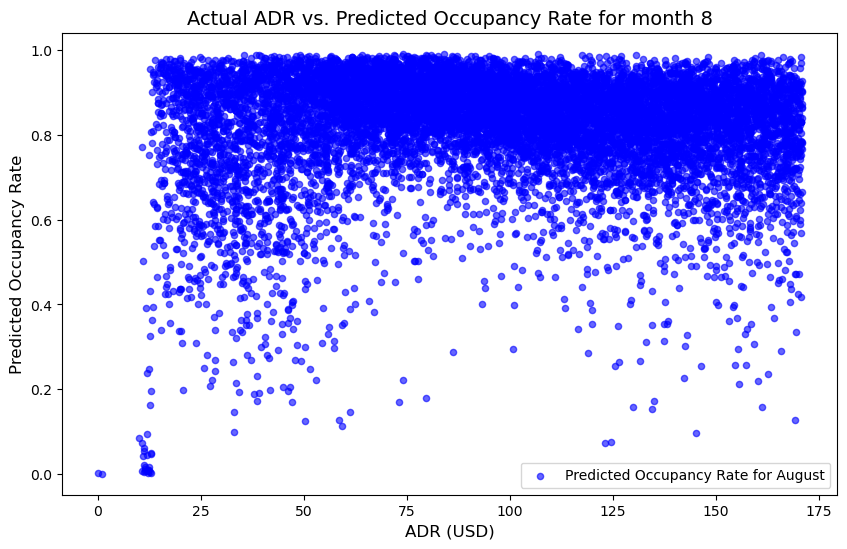

In [90]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_adr_vs_predicted_occupancy_august_scatter(X_test, xgb_clf,month):
    # Filter for August data
    X_august = X_test[X_test['Month'] == month]
    
    unique_adrs = np.sort(X_august['adr_usd'].unique())  # Get unique ADR values for August and sort them
    predicted_occupancy_rates = []
    
    for adr in unique_adrs:
        X_temp = X_august[X_august['adr_usd'] == adr]  # Filter rows with the current ADR within August data
        predicted_occupancy = xgb_clf.predict_proba(X_temp)[:, 1]  # Assuming binary classification (occupied/not occupied)
        mean_predicted_occupancy = np.mean(predicted_occupancy)
        predicted_occupancy_rates.append(mean_predicted_occupancy)
    
    # Plotting as a scatter plot correctly
    plt.figure(figsize=(10, 6))
    plt.scatter(unique_adrs, predicted_occupancy_rates, s=20, c='b', label='Predicted Occupancy Rate for August', alpha=0.6)
    plt.title(f'Actual ADR vs. Predicted Occupancy Rate for month {month}', fontsize=14)
    plt.xlabel('ADR (USD)', fontsize=12)
    plt.ylabel('Predicted Occupancy Rate', fontsize=12)
    plt.legend()
    plt.show()


plot_actual_adr_vs_predicted_occupancy_august_scatter(X_test, xgb_clf, 8)


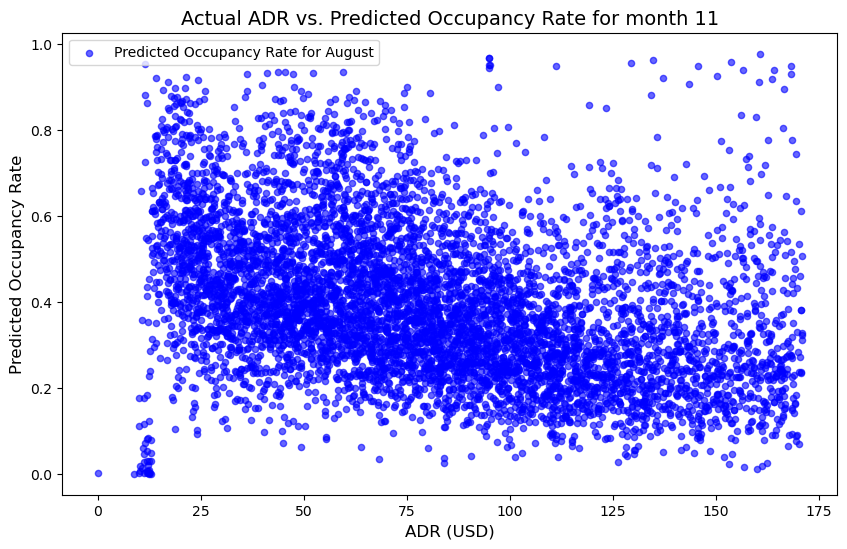

In [91]:
plot_actual_adr_vs_predicted_occupancy_august_scatter(X_test, xgb_clf, 11)

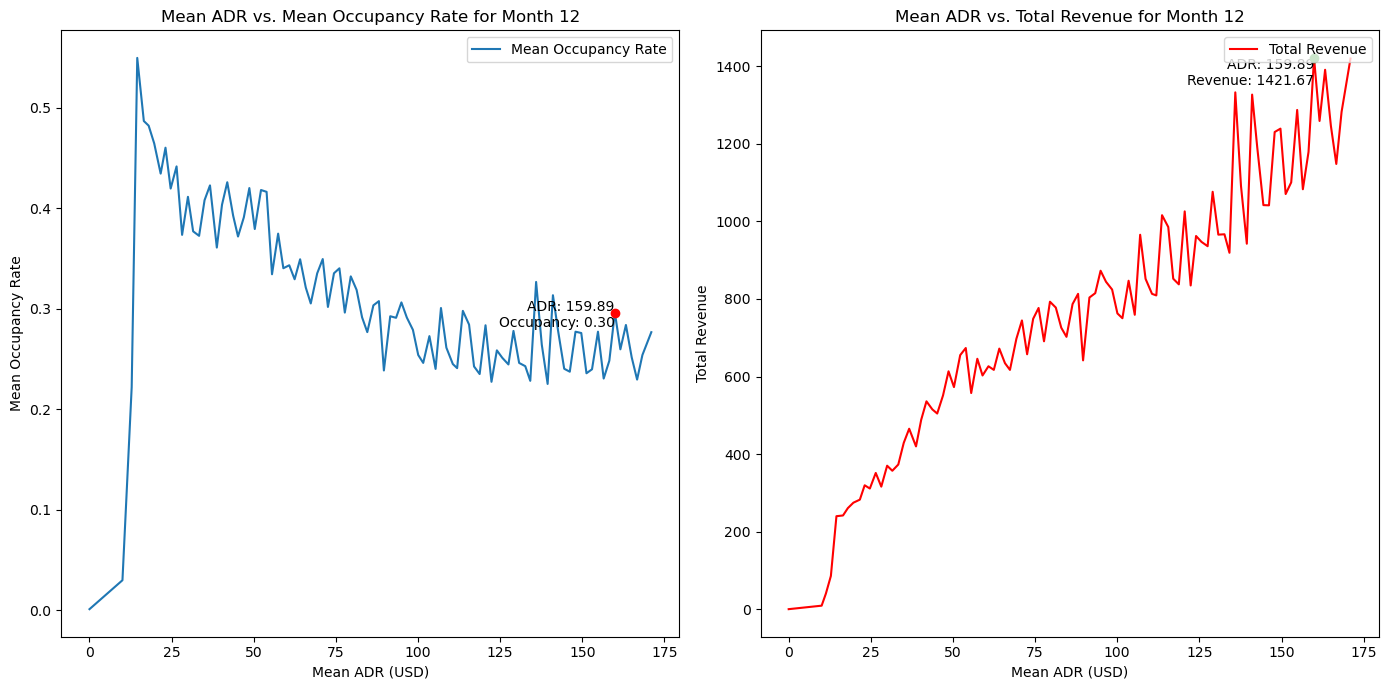

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_adr_occupancy_revenue(X_test, xgb_clf, month):
    # Filtrar por el mes dado
    X_month = X_test[X_test['Month'] == month].copy()  # Hacer una copia para evitar SettingWithCopyWarning
    
    # Divide los valores de ADR en 100 intervalos de igual ancho
    adr_min, adr_max = X_month['adr_usd'].min(), X_month['adr_usd'].max()
    bins = np.linspace(adr_min, adr_max, 101)
    X_month['adr_bin'] = pd.cut(X_month['adr_usd'], bins, labels=np.arange(100), include_lowest=True)
    
    # Preparar listas para almacenar los resultados
    mean_adrs = []
    mean_occupancies = []
    total_revenues = []
    
    for i in range(100):
        # Filtrar las filas que caen en el intervalo actual
        X_bin = X_month[X_month['adr_bin'] == i]
        
        if not X_bin.empty:
            # Preparar X_bin para la predicción, excluyendo 'adr_bin'
            X_bin_for_prediction = X_bin.drop(columns=['adr_bin'])
            
            # Calcular la media de ADR en el intervalo
            mean_adr = X_bin['adr_usd'].mean()
            mean_adrs.append(mean_adr)
            
            # Predecir la tasa de ocupación y calcular la media
            predicted_occupancy = xgb_clf.predict_proba(X_bin_for_prediction)[:, 1]
            mean_occupancy = np.mean(predicted_occupancy)
            mean_occupancies.append(mean_occupancy)
            
            # Calcular los ingresos totales
            total_revenue = mean_adr * mean_occupancy * 30  # Asumiendo 30 días en el mes
            total_revenues.append(total_revenue)
    
    # Encontrar el ADR que maximiza el ingreso total
    max_revenue_index = np.argmax(total_revenues)
    max_revenue_adr = mean_adrs[max_revenue_index]
    max_revenue = total_revenues[max_revenue_index]
    max_occupancy = mean_occupancies[max_revenue_index]

    # Plotear
    plt.figure(figsize=(14, 7))
    
    # Gráfico de Tasa de Ocupación
    plt.subplot(1, 2, 1)
    plt.plot(mean_adrs, mean_occupancies, label='Mean Occupancy Rate')
    plt.scatter([max_revenue_adr], [max_occupancy], color='red', zorder=5)
    plt.text(max_revenue_adr, max_occupancy*0.95, f'ADR: {max_revenue_adr:.2f}\nOccupancy: {max_occupancy:.2f}', ha='right')
    plt.xlabel('Mean ADR (USD)')
    plt.ylabel('Mean Occupancy Rate')
    plt.title(f'Mean ADR vs. Mean Occupancy Rate for Month {month}')
    plt.legend(loc='upper right')
    
    # Gráfico de Ingresos Totales
    plt.subplot(1, 2, 2)
    plt.plot(mean_adrs, total_revenues, label='Total Revenue', color='red')
    plt.scatter([max_revenue_adr], [max_revenue], color='green', zorder=5)
    plt.text(max_revenue_adr, max_revenue*0.95, f'ADR: {max_revenue_adr:.2f}\nRevenue: {max_revenue:.2f}', ha='right')
    plt.xlabel('Mean ADR (USD)')
    plt.ylabel('Total Revenue')
    plt.title(f'Mean ADR vs. Total Revenue for Month {month}')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()



    
plot_adr_occupancy_revenue(X_test, xgb_clf, 12)

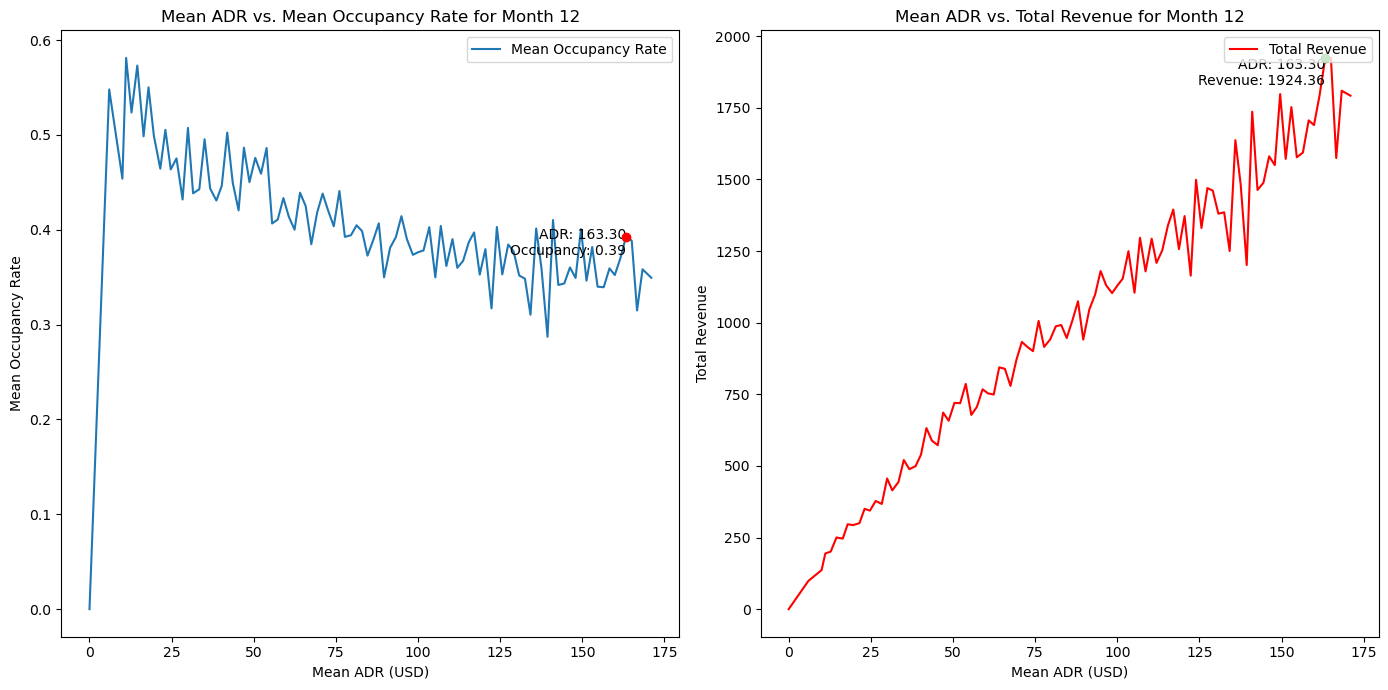

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_actual_adr_occupancy_revenue(df, month):
    # Filtrar por el mes dado
    X_month = df[df['Month'] == month].copy()  # Hacer una copia para evitar SettingWithCopyWarning
    
    # Divide los valores de ADR en 100 intervalos de igual ancho
    adr_min, adr_max = X_month['adr_usd'].min(), X_month['adr_usd'].max()
    bins = np.linspace(adr_min, adr_max, 101)
    X_month['adr_bin'] = pd.cut(X_month['adr_usd'], bins, labels=np.arange(100), include_lowest=True)
    
    # Preparar listas para almacenar los resultados
    mean_adrs = []
    mean_occupancies = []
    total_revenues = []
    
    for i in range(100):
        # Filtrar las filas que caen en el intervalo actual
        X_bin = X_month[X_month['adr_bin'] == i]
        
        if not X_bin.empty:
            # Calcular la media de ADR en el intervalo
            mean_adr = X_bin['adr_usd'].mean()
            mean_adrs.append(mean_adr)
            
            # Usar la tasa de ocupación real en lugar de predecirla
            mean_occupancy = X_bin['occupancy_rate'].mean()  # Asumiendo que 'occupancy_rate' es la columna de tasa de ocupación actual
            mean_occupancies.append(mean_occupancy)
            
            # Calcular los ingresos totales
            total_revenue = mean_adr * mean_occupancy * 30  # Asumiendo 30 días en el mes
            total_revenues.append(total_revenue)
    
    # Encontrar el ADR que maximiza el ingreso total
    max_revenue_index = np.argmax(total_revenues)
    max_revenue_adr = mean_adrs[max_revenue_index]
    max_revenue = total_revenues[max_revenue_index]
    max_occupancy = mean_occupancies[max_revenue_index]

    # Plotear
    plt.figure(figsize=(14, 7))
    
    # Gráfico de Tasa de Ocupación
    plt.subplot(1, 2, 1)
    plt.plot(mean_adrs, mean_occupancies, label='Mean Occupancy Rate')
    plt.scatter([max_revenue_adr], [max_occupancy], color='red', zorder=5)
    plt.text(max_revenue_adr, max_occupancy*0.95, f'ADR: {max_revenue_adr:.2f}\nOccupancy: {max_occupancy:.2f}', ha='right')
    plt.xlabel('Mean ADR (USD)')
    plt.ylabel('Mean Occupancy Rate')
    plt.title(f'Mean ADR vs. Mean Occupancy Rate for Month {month}')
    plt.legend(loc='upper right')
    
    # Gráfico de Ingresos Totales
    plt.subplot(1, 2, 2)
    plt.plot(mean_adrs, total_revenues, label='Total Revenue', color='red')
    plt.scatter([max_revenue_adr], [max_revenue], color='green', zorder=5)
    plt.text(max_revenue_adr, max_revenue*0.95, f'ADR: {max_revenue_adr:.2f}\nRevenue: {max_revenue:.2f}', ha='right')
    plt.xlabel('Mean ADR (USD)')
    plt.ylabel('Total Revenue')
    plt.title(f'Mean ADR vs. Total Revenue for Month {month}')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

    
plot_actual_adr_occupancy_revenue(df, 12)

In [120]:
import pandas as pd

def plot_actual_adr_occupancy_revenue_to_excel(df, month, excel_filename):
    X_month = df[df['Month'] == month].copy()
    
    adr_min, adr_max = X_month['adr_usd'].min(), X_month['adr_usd'].max()
    bins = np.linspace(adr_min, adr_max, 101)
    X_month['adr_bin'] = pd.cut(X_month['adr_usd'], bins, labels=np.arange(100), include_lowest=True)
    
    data = {
        'Mean ADR': [],
        'Actual Mean Occupancy Rate': [],
        'Observations per Bin': []
    }
    
    for i in range(100):
        X_bin = X_month[X_month['adr_bin'] == i]
        
        if not X_bin.empty:
            mean_adr = X_bin['adr_usd'].mean()
            # Asumiendo que 'occupancy_rate' es la columna de tasa de ocupación actual
            actual_mean_occupancy = X_bin['occupancy_rate'].mean() 
            
            data['Mean ADR'].append(mean_adr)
            data['Actual Mean Occupancy Rate'].append(actual_mean_occupancy)
            data['Observations per Bin'].append(len(X_bin))
    
    # Crear DataFrame
    results_df = pd.DataFrame(data)
    
    # Exportar a Excel
    results_df.to_excel(excel_filename, index=False, engine='openpyxl')
    
    print(f'Data exported to {excel_filename}')

plot_actual_adr_occupancy_revenue_to_excel(df, 12, excel_filename)

Data exported to adr_occupancy_revenue_data.xlsx


In [115]:
def plot_adr_occupancy_revenue_to_excel(X_test, xgb_clf, month, excel_filename):
    X_month = X_test[X_test['Month'] == month].copy()
    
    adr_min, adr_max = X_month['adr_usd'].min(), X_month['adr_usd'].max()
    bins = np.linspace(adr_min, adr_max, 101)
    X_month['adr_bin'] = pd.cut(X_month['adr_usd'], bins, labels=np.arange(100), include_lowest=True)
    
    data = {
        'Mean ADR': [],
        'Mean Occupancy Rate': [],
        'Observations per Bin': []
    }
    
    for i in range(100):
        X_bin = X_month[X_month['adr_bin'] == i]
        
        if not X_bin.empty:
            X_bin_for_prediction = X_bin.drop(columns=['adr_bin'])
            
            mean_adr = X_bin['adr_usd'].mean()
            predicted_occupancy = xgb_clf.predict_proba(X_bin_for_prediction)[:, 1]
            mean_occupancy = np.mean(predicted_occupancy)
            
            data['Mean ADR'].append(mean_adr)
            data['Mean Occupancy Rate'].append(mean_occupancy)
            data['Observations per Bin'].append(len(X_bin))
    
    # Crear DataFrame
    results_df = pd.DataFrame(data)
    
    # Exportar a Excel
    results_df.to_excel(excel_filename, index=False, engine='openpyxl')
    
    print(f'Data exported to {excel_filename}')

# Ejemplo de uso de la función
excel_filename = 'adr_occupancy_revenue_data.xlsx'
plot_adr_occupancy_revenue_to_excel(X_test, xgb_clf, 12, excel_filename)



Data exported to adr_occupancy_revenue_data.xlsx


In [114]:
results_df

,Scenario,Mean ADR Used ($),Predicted Occupancy Rate
0,Unchanged,54.016541,0.395856
1,Doubled,108.033082,0.309886
2,Divided by 2,27.008270,0.451376


In [48]:
specific_municipality = 'Calp'  # Adjust to the actual supply_id you want to analyze
specific_month = 8


df_sorted = df.sort_values(by='date_in')
# df_filtered = df_sorted[~((df_sorted['occupancy_rate'] == 0) & (df_sorted['adr_usd'] == 0))]


df_sampled = df_sorted.sample(frac=1, random_state=42)  # Using the entire dataset

# Extract the timestamps for train and test split
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Create train and test sets
train_set = df_sampled[df_sampled['date_in'] <= train_end_date]
test_set = df_sampled[df_sampled['date_in'] >= test_start_date]
test_set = test_set[test_set['Month'] == specific_month]

# Feature selection
X_train = train_set.drop(columns=['occupancy_rate', 'Province_y', 'Municipality_y', 'date_in','blocked_days', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'Municipality', 'supply_id'])
y_train = train_set['occupancy_rate']
X_test_specific = test_set.drop(columns=['occupancy_rate', 'Province_y', 'Municipality_y', 'date_in','blocked_days', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'Municipality', 'supply_id'])
y_test = test_set['occupancy_rate']

estimate_revenue_occupancy_and_plot_percentages(X_test_specific, total_days=30)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:operation_type: object, operation_subtype: object, property_type: object, property_subtype: object, property_use: object, geo_id: object, last_scrapped_date: object, Listing Main Image URL: object, Amenities: object, Province_x: object, Municipality_x: object, policy_category: object, Province: object, Número de áreas de residencia distintas en las que reside población que se encuentra durante el día en esta área: object, Provincia: object

In [ ]:
specific_municipality = 'Calp'  # Adjust to the actual supply_id you want to analyze
specific_month = 12


df_sorted = df.sort_values(by='date_in')
# df_filtered = df_sorted[~((df_sorted['occupancy_rate'] == 0) & (df_sorted['adr_usd'] == 0))]


df_sampled = df_sorted.sample(frac=1, random_state=42)  # Using the entire dataset

# Extract the timestamps for train and test split
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'

# Create train and test sets
train_set = df_sampled[df_sampled['date_in'] <= train_end_date]
test_set = df_sampled[df_sampled['date_in'] >= test_start_date]
test_set = test_set[test_set['Month'] == specific_month]

# Feature selection
X_train = train_set.drop(columns=['occupancy_rate', 'Province_y', 'Municipality_y', 'date_in','blocked_days', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'Municipality', 'supply_id'])
y_train = train_set['occupancy_rate']
X_test_specific = test_set.drop(columns=['occupancy_rate', 'Province_y', 'Municipality_y', 'date_in','blocked_days', 'reservation_days', 'n_bookings', 'available_days', 'revenue_usd', 'Municipality', 'supply_id'])
y_test = test_set['occupancy_rate']

estimate_revenue_occupancy_and_plot_percentages(X_test_specific, total_days=30)

In [55]:
import pandas as pd
import numpy as np

def estimate_optimal_revenue_per_month_with_percentage_change(X_test, total_days=30):
    """
    Estimate optimal revenue and corresponding occupancy rate for a range of percentage changes to ADR values per month.
    
    Args:
    - X_test (DataFrame): The feature set for prediction, including a 'date_in' or 'Month' column.
    - total_days (int): Total available days in each month being considered.
    
    Returns:
    - DataFrame with optimal results per month, including the percentage change and estimated revenue.
    """
    if 'Month' not in X_test.columns:
        X_test['Month'] = pd.to_datetime(X_test['date_in']).dt.month

    percentage_changes = np.linspace(-0.5, 0.5, 21)  # From -50% to +50% in increments of 5%
    results = []

    for month in sorted(X_test['Month'].unique()):
        optimal_revenue = -np.inf
        optimal_percentage_change = 0
        optimal_mean_adr = 0
        optimal_occupancy_rate = 0
        
        for percentage_change in percentage_changes:
            X_temp = X_test[X_test['Month'] == month].copy()
            X_temp['adr_usd'] *= (1 + percentage_change)

            predicted_occupancy = xgb_clf.predict_proba(X_temp)[:, 1]
            mean_predicted_occupancy = np.mean(predicted_occupancy)
            
            adjusted_adr_mean = X_temp['adr_usd'].mean()
            estimated_revenue = mean_predicted_occupancy * adjusted_adr_mean * total_days
            
            if estimated_revenue > optimal_revenue:
                optimal_revenue = estimated_revenue
                optimal_percentage_change = percentage_change * 100
                optimal_mean_adr = adjusted_adr_mean
                optimal_occupancy_rate = mean_predicted_occupancy
        
        results.append((month, optimal_percentage_change, optimal_mean_adr, optimal_revenue, optimal_occupancy_rate))

    return pd.DataFrame(results, columns=['Month', 'Optimal Percentage Change', 'Adjusted Mean ADR ($)', 'Optimal Estimated Revenue ($)', 'Optimal Predicted Occupancy Rate'])

# Ensure xgb_clf is your trained model and X_test is your prepared DataFrame with 'date_in'
# And ensure 'total_days' reflects the number of days considered for revenue estimation in a month
estimated_optimal_revenues_df = estimate_optimal_revenue_per_month_with_percentage_change(X_test, total_days=30)

print(estimated_optimal_revenues_df)


   Month  Optimal Percentage Change  Adjusted Mean ADR ($)  \
0      4                       50.0              49.703481   
1      5                       50.0              47.011262   
2      6                       50.0              66.476584   
3      7                       50.0              87.274852   
4      8                       50.0              96.396158   
5      9                       50.0              70.817237   
6     10                       50.0              54.193478   
7     11                       50.0              40.122382   
8     12                       50.0              42.553064   

   Optimal Estimated Revenue ($)  Optimal Predicted Occupancy Rate  
0                     166.016246                          0.111338  
1                     173.544330                          0.123052  
2                     319.229940                          0.160071  
3                     807.245342                          0.308315  
4                    1216.232519  

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

def maximize_annual_revenue(X_test, xgb_clf, total_days_per_month=30):
    # Initialize variables to track the overall annual revenue and details for each month.
    total_annual_revenue = 0
    detailed_monthly_results = {}

    for month in range(1, 13):  # Iterate over all months
        X_temp_month = X_test[X_test['Month'] == month].copy()
        if X_temp_month.empty:
            continue  # Skip if no data for the month
        
        optimal_monthly_revenue, optimal_adr, optimal_occupancy, percentage_change = optimize_monthly_revenue(X_temp_month, xgb_clf, total_days_per_month)
        
        # Update total annual revenue and store detailed results for the month
        total_annual_revenue += optimal_monthly_revenue
        detailed_monthly_results[month] = {
            'Optimal ADR Adjustment (%)': percentage_change * 100,
            'Optimal ADR ($)': optimal_adr,
            'Predicted Occupancy Rate (%)': optimal_occupancy * 100,
            'Estimated Monthly Revenue ($)': optimal_monthly_revenue
        }

    # Summarize and return the results
    print(f"Total Estimated Annual Revenue: ${total_annual_revenue:.2f}")
    for month, results in detailed_monthly_results.items():
        print(f"Month: {month}, Results: {results}")
    
    return detailed_monthly_results, total_annual_revenue

def optimize_monthly_revenue(X_temp_month, xgb_clf, total_days_per_month):
    percentage_changes = np.linspace(-0.5, 0.5, 21)  # Explore ADR adjustments from -50% to +50%
    optimal_revenue = 0
    optimal_adr = 0
    optimal_occupancy = 0
    optimal_percentage_change = 0

    for percentage_change in percentage_changes:
        X_adjusted = X_temp_month.copy()
        X_adjusted['adr_usd'] *= (1 + percentage_change)
        
        # Predict occupancy rate with the adjusted ADR
        predicted_occupancy = xgb_clf.predict_proba(X_adjusted)[:, 1].mean()
        estimated_revenue = predicted_occupancy * X_adjusted['adr_usd'].mean() * total_days_per_month
        
        # Update optimal values if this adjustment leads to higher revenue
        if estimated_revenue > optimal_revenue:
            optimal_revenue = estimated_revenue
            optimal_adr = X_adjusted['adr_usd'].mean()
            optimal_occupancy = predicted_occupancy
            optimal_percentage_change = percentage_change
    
    return optimal_revenue, optimal_adr, optimal_occupancy, optimal_percentage_change

maximize_annual_revenue(X_test, xgb_clf, total_days_per_month=30)

Total Estimated Annual Revenue: $3675.29
Month: 1, Results: {'Optimal ADR Adjustment (%)': 50.0, 'Optimal ADR ($)': 31.35095165628539, 'Predicted Occupancy Rate (%)': 7.025551795959473, 'Estimated Monthly Revenue ($)': 66.07732041415633}
Month: 2, Results: {'Optimal ADR Adjustment (%)': 50.0, 'Optimal ADR ($)': 23.283407843685552, 'Predicted Occupancy Rate (%)': 6.800634413957596, 'Estimated Monthly Revenue ($)': 47.50258339679346}
Month: 4, Results: {'Optimal ADR Adjustment (%)': 50.0, 'Optimal ADR ($)': 49.7034807589226, 'Predicted Occupancy Rate (%)': 11.12835556268692, 'Estimated Monthly Revenue ($)': 165.9354019765376}
Month: 5, Results: {'Optimal ADR Adjustment (%)': 50.0, 'Optimal ADR ($)': 47.01126247814251, 'Predicted Occupancy Rate (%)': 12.392520904541016, 'Estimated Monthly Revenue ($)': 174.77641590277372}
Month: 6, Results: {'Optimal ADR Adjustment (%)': 50.0, 'Optimal ADR ($)': 66.4765835456668, 'Predicted Occupancy Rate (%)': 16.070975363254547, 'Estimated Monthly Reven

({1: {'Optimal ADR Adjustment (%)': 50.0,
   'Optimal ADR ($)': 31.35095165628539,
   'Predicted Occupancy Rate (%)': 7.025551795959473,
   'Estimated Monthly Revenue ($)': 66.07732041415633},
  2: {'Optimal ADR Adjustment (%)': 50.0,
   'Optimal ADR ($)': 23.283407843685552,
   'Predicted Occupancy Rate (%)': 6.800634413957596,
   'Estimated Monthly Revenue ($)': 47.50258339679346},
  4: {'Optimal ADR Adjustment (%)': 50.0,
   'Optimal ADR ($)': 49.7034807589226,
   'Predicted Occupancy Rate (%)': 11.12835556268692,
   'Estimated Monthly Revenue ($)': 165.9354019765376},
  5: {'Optimal ADR Adjustment (%)': 50.0,
   'Optimal ADR ($)': 47.01126247814251,
   'Predicted Occupancy Rate (%)': 12.392520904541016,
   'Estimated Monthly Revenue ($)': 174.77641590277372},
  6: {'Optimal ADR Adjustment (%)': 50.0,
   'Optimal ADR ($)': 66.4765835456668,
   'Predicted Occupancy Rate (%)': 16.070975363254547,
   'Estimated Monthly Revenue ($)': 320.5030609187231},
  7: {'Optimal ADR Adjustment (%)

# Scenario 2: Maximizing Revenue With Constraints

In [24]:
def estimate_revenue_with_annual_strategy(X_test, total_days_per_month=30, blackout_months=[], max_occupancy_rate=None):
    percentage_changes = np.linspace(-0.5, 0.5, 21)  # ADR adjustments
    monthly_optimal_adr_adjustments = {}
    
    for month in range(1, 13):  # For each month
        if month in blackout_months:
            continue  # Skip blackout months
        
        X_temp_month = X_test[X_test['Month'] == month].copy()
        if X_temp_month.empty:
            continue  # Skip if no data for the month
        
        estimated_revenues = []
        predicted_occupancy_rates = []
        
        for percentage_change in percentage_changes:
            X_temp = X_temp_month.copy()
            X_temp['adr_usd'] *= (1 + percentage_change)
            
            predicted_occupancy = xgb_clf.predict_proba(X_temp)[:, 1]
            mean_predicted_occupancy = np.mean(predicted_occupancy)
            
            if max_occupancy_rate is not None:
                mean_predicted_occupancy = min(mean_predicted_occupancy, max_occupancy_rate)
            
            estimated_revenue = mean_predicted_occupancy * X_temp['adr_usd'].mean() * total_days_per_month
            estimated_revenues.append(estimated_revenue)
            predicted_occupancy_rates.append(mean_predicted_occupancy)
        
        optimal_index = np.argmax(estimated_revenues)
        optimal_adr_adjustment = percentage_changes[optimal_index] * 100  # Convert to percentage
        optimal_occupancy_rate = predicted_occupancy_rates[optimal_index]
        max_revenue = estimated_revenues[optimal_index]
        
        monthly_optimal_adr_adjustments[month] = {
            'Optimal ADR Adjustment (%)': optimal_adr_adjustment,
            'Associated Occupancy Rate': optimal_occupancy_rate,
            'Total Revenue Generated ($)': max_revenue
        }
    
    return monthly_optimal_adr_adjustments

# Usage example
# annual_strategy = estimate_revenue_with_annual_strategy(X_test, total_days_per_month=30, blackout_months=[8], max_occupancy_rate=None)
# for month, strategy in annual_strategy.items():
#     print(f"Month: {month}, Strategy: {strategy}")
estimate_revenue_with_annual_strategy(X_test, total_days_per_month=30, blackout_months=[8], max_occupancy_rate=None)


{1: {'Optimal ADR Adjustment (%)': 50.0,
  'Associated Occupancy Rate': 0.07025552,
  'Total Revenue Generated ($)': 66.07732041415633},
 2: {'Optimal ADR Adjustment (%)': 50.0,
  'Associated Occupancy Rate': 0.068006344,
  'Total Revenue Generated ($)': 47.50258339679346},
 4: {'Optimal ADR Adjustment (%)': 50.0,
  'Associated Occupancy Rate': 0.111283556,
  'Total Revenue Generated ($)': 165.9354019765376},
 5: {'Optimal ADR Adjustment (%)': 50.0,
  'Associated Occupancy Rate': 0.12392521,
  'Total Revenue Generated ($)': 174.77641590277372},
 6: {'Optimal ADR Adjustment (%)': 50.0,
  'Associated Occupancy Rate': 0.16070975,
  'Total Revenue Generated ($)': 320.5030609187231},
 7: {'Optimal ADR Adjustment (%)': 50.0,
  'Associated Occupancy Rate': 0.3,
  'Total Revenue Generated ($)': 785.4736700089243},
 9: {'Optimal ADR Adjustment (%)': 50.0,
  'Associated Occupancy Rate': 0.20878977,
  'Total Revenue Generated ($)': 443.57743118626576},
 10: {'Optimal ADR Adjustment (%)': 50.0,
  

# Minimizing Occuoancy Rate at a Minimum Revenue

In [29]:
import numpy as np

def minimize_occupancy_for_revenue(X_test, xgb_clf, annual_revenue_target, blackout_months=[], total_days_per_month=30):
    # Assuming X_test already contains the features required by the XGBoost model, including 'Month' and 'adr_usd'
    
    percentage_changes = np.linspace(-0.5, 0.5, 21)  # Potential ADR adjustments
    optimal_strategy = {}
    total_estimated_revenue = 0
    total_estimated_occupancy = 0
    
    for month in range(1, 13):
        if month in blackout_months:
            continue
        
        X_temp_month = X_test[X_test['Month'] == month].copy()
        if X_temp_month.empty:
            continue
        
        best_adr_adjustment = None
        lowest_occupancy = float('inf')
        best_revenue = 0
        best_predicted_occupancy = 0
        
        for percentage_change in percentage_changes:
            X_temp = X_temp_month.copy()
            X_temp['adr_usd'] *= (1 + percentage_change)
            predicted_occupancy = xgb_clf.predict_proba(X_temp)[:, 1].mean()  # Average predicted occupancy rate
            predicted_adr = X_temp['adr_usd'].mean()
            estimated_revenue = predicted_occupancy * predicted_adr * total_days_per_month
            
            # Optimize for lowest occupancy while ensuring revenue target is met or exceeded
            if estimated_revenue >= annual_revenue_target / (12 - len(blackout_months)) and predicted_occupancy < lowest_occupancy:
                lowest_occupancy = predicted_occupancy
                best_adr_adjustment = percentage_change
                best_revenue = estimated_revenue
                best_predicted_occupancy = predicted_occupancy
        
        if best_adr_adjustment is not None:
            optimal_strategy[month] = {
                'ADR Adjustment (%)': best_adr_adjustment * 100, 
                'Used ADR ($)': X_temp_month['adr_usd'].mean() * (1 + best_adr_adjustment),
                'Estimated Revenue ($)': best_revenue,
                'Predicted Occupancy (%)': best_predicted_occupancy * 100
            }
            total_estimated_revenue += best_revenue
            total_estimated_occupancy += best_predicted_occupancy * total_days_per_month
    
    # Check if the total estimated revenue meets the target
    if total_estimated_revenue < annual_revenue_target:
        print("Warning: Unable to meet the annual revenue target with the given constraints. Total Estimated Revenue: ${:.2f}".format(total_estimated_revenue))
    else:
        print("Annual Revenue Target Met or Exceeded. Total Estimated Revenue: ${:.2f}".format(total_estimated_revenue))
    
    # Return the optimal strategy for each month, total estimated revenue, and total estimated occupancy
    return optimal_strategy, total_estimated_revenue, total_estimated_occupancy


minimize_occupancy_for_revenue(X_test, xgb_clf, 400, blackout_months=[6], total_days_per_month=30)

Annual Revenue Target Met or Exceeded. Total Estimated Revenue: $3354.78


({1: {'ADR Adjustment (%)': 50.0,
   'Used ADR ($)': 31.35095165628539,
   'Estimated Revenue ($)': 66.07732041415633,
   'Predicted Occupancy (%)': 7.025551795959473},
  2: {'ADR Adjustment (%)': 50.0,
   'Used ADR ($)': 23.283407843685556,
   'Estimated Revenue ($)': 47.50258339679346,
   'Predicted Occupancy (%)': 6.800634413957596},
  4: {'ADR Adjustment (%)': 50.0,
   'Used ADR ($)': 49.70348075892258,
   'Estimated Revenue ($)': 165.9354019765376,
   'Predicted Occupancy (%)': 11.12835556268692},
  5: {'ADR Adjustment (%)': 50.0,
   'Used ADR ($)': 47.0112624781425,
   'Estimated Revenue ($)': 174.77641590277372,
   'Predicted Occupancy (%)': 12.392520904541016},
  7: {'ADR Adjustment (%)': 50.0,
   'Used ADR ($)': 87.27485222321381,
   'Estimated Revenue ($)': 813.2265596422562,
   'Predicted Occupancy (%)': 31.059980392456055},
  8: {'ADR Adjustment (%)': 50.0,
   'Used ADR ($)': 96.39615846954862,
   'Estimated Revenue ($)': 1220.706979449253,
   'Predicted Occupancy (%)': 42.

In [122]:
def collect_listing_details():
    print("Welcome to the Airbnb Listing Assistant!")

    # Numeric Inputs
    n_rooms = int(input("Number of rooms: "))
    n_baths = int(input("Number of bathrooms: "))
    max_guests = int(input("Maximum number of guests: "))
    deposit_usd = float(input("Security deposit amount (USD): "))
    cleaning_fee_usd = float(input("Cleaning fee (USD): "))
    extra_people_fee_usd = float(input("Extra people fee (USD): "))
    min_stay = int(input("Minimum stay (nights): "))
    n_photos = int(input("Number of photos in the listing: "))
    lat = float(input("Latitude of the property: "))
    lon = float(input("Longitude of the property: "))
    
    # Numeric LTM Inputs
    n_bookings_ltm = int(input("Number of bookings in the last twelve months (LTM): "))
    n_reviews_ltm = int(input("Number of reviews in LTM: "))
    reservation_days_ltm = int(input("Total reservation days in LTM: "))
    available_days_ltm = int(input("Total available days in LTM: "))
    blocked_days_ltm = int(input("Total blocked days in LTM: "))
    occupancy_rate_ltm = float(input("Occupancy rate in LTM (as a decimal): "))
    anual_revenue_usd = float(input("Annual revenue in USD: "))

    # Binary Inputs for Amenities and Yes/No Questions
    amenities_list = ['kitchen', 'washer', 'tv', 'essentials', 'wireless_internet', 'ac', 'pool', 'hair_dryer', 'free_parking', 'hot_water', 'elevator', 'laptop_friendly']
    amenities_dict = {amenity: int(input(f"Does the property have {amenity.replace('_', ' ')}? (yes/no): ").strip().lower() == 'yes') for amenity in amenities_list}
    
    is_instantbookable = int(input("Is the property instant bookable? (yes/no): ").strip().lower() == 'yes')
    is_superhost = int(input("Are you a superhost? (yes/no): ").strip().lower() == 'yes')
    
    # Province - One-hot Encoding
    provinces = ['Alicante/Alacant', 'Castellón/Castelló', 'Valencia/València']
    print("Province options: Alicante/Alacant, Castellón/Castelló, Valencia/València")
    province_input = input("In which province is your property located?: ").strip()
    province_dict = {f'Provincia_{province.replace("/", "_")}': 1 if province_input == province else 0 for province in provinces}

    # Combine all inputs into a single dictionary
    listing_details = {
        **{'n_rooms': n_rooms, 'n_baths': n_baths, 'max_guests': max_guests, 'deposit_usd': deposit_usd, 'cleaning_fee_usd': cleaning_fee_usd,
           'extra_people_fee_usd': extra_people_fee_usd, 'min_stay': min_stay, 'n_photos': n_photos, 'lat': lat, 'lon': lon,
           'n_bookings_ltm': n_bookings_ltm, 'n_reviews_ltm': n_reviews_ltm, 'reservation_days_ltm': reservation_days_ltm,
           'available_days_ltm': available_days_ltm, 'blocked_days_ltm': blocked_days_ltm, 'occupancy_rate_ltm': occupancy_rate_ltm,
           'anual_revenue_usd': anual_revenue_usd, 'is_instantbookable': is_instantbookable, 'is_superhost': is_superhost},
        **amenities_dict,
        **province_dict
    }

    return listing_details

# Collect listing details from the host
listing_details = collect_listing_details()

# Convert to DataFrame for the model
df_listing_details = pd.DataFrame([listing_details])


Welcome to the Airbnb Listing Assistant!


Number of rooms:  4
Number of bathrooms:  2
Maximum number of guests:  6
Security deposit amount (USD):  20
Cleaning fee (USD):  5
Extra people fee (USD):  10
Minimum stay (nights):  2
Number of photos in the listing:  7
Latitude of the property:  39
Longitude of the property:  29
Number of bookings in the last twelve months (LTM):  230
Number of reviews in LTM:  500
Total reservation days in LTM:  230
Total available days in LTM:  300
Total blocked days in LTM:  100
Occupancy rate in LTM (as a decimal):  0.5
Annual revenue in USD:  1500
Does the property have kitchen? (yes/no):  yes
Does the property have washer? (yes/no):  yes
Does the property have tv? (yes/no):  yes
Does the property have essentials? (yes/no):  yes
Does the property have wireless internet? (yes/no):  yes
Does the property have ac? (yes/no):  no
Does the property have pool? (yes/no):  no
Does the property have hair dryer? (yes/no):  ye
Does the property have free parking? (yes/no):  no
Does the property have hot wat

Province options: Alicante/Alacant, Castellón/Castelló, Valencia/València


In which province is your property located?:  Valencia/València


In [124]:
df.columns

Index(['supply_id', 'date_in', 'revenue_usd', 'n_rooms', 'n_baths',
       'max_guests', 'deposit_usd', 'cleaning_fee_usd', 'extra_people_fee_usd',
       'min_stay', 'n_photos', 'is_instantbookable', 'lat', 'lon', 'rating',
       'is_superhost', 'occupancy_rate', 'n_bookings', 'reservation_days',
       'available_days', 'blocked_days', 'adr_usd', 'n_bookings_ltm',
       'n_reviews_ltm', 'reservation_days_ltm', 'available_days_ltm',
       'anual_revenue_usd', 'blocked_days_ltm', 'occupancy_rate_ltm',
       'kitchen', 'washer', 'tv', 'essentials', 'wireless_internet', 'hangers',
       'iron', 'heating', 'ac', 'pool', 'hair-dryer', 'free_parking',
       'hot_water', 'elevator', 'laptop-friendly', 'distance_to_closest_beach',
       'Province_y', 'Municipality_y', 'Month', 'Municipality',
       'Población residente (A)',
       'Población no residente que se localiza durante el día en esta área (D)',
       'Población total que se localiza durante el día en el área (E=B+D)',
     